In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('diabetes_data_upload.csv')

In [ ]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [ ]:
df.tail()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative
519,42,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative


In [ ]:
df.sample(10)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
93,40,Female,Yes,Yes,No,Yes,Yes,No,No,Yes,No,No,Yes,No,No,No,Positive
182,35,Female,Yes,Yes,No,No,No,No,Yes,No,No,No,No,No,Yes,No,Positive
244,54,Male,No,No,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,No,Negative
459,57,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,No,No,No,Positive
496,53,Male,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,Yes,Yes,No,Negative
467,43,Male,No,No,No,Yes,No,Yes,No,Yes,No,Yes,No,No,Yes,No,Negative
212,43,Male,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,Negative
493,44,Male,Yes,No,Yes,Yes,No,Yes,No,Yes,No,Yes,No,No,Yes,Yes,Negative
464,30,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative
326,53,Male,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,Yes,Yes,No,Negative


In [ ]:
original_features_count = df.columns

In [ ]:
row_count = df.shape[0]

In [ ]:
print('Original Features count:', len(original_features_count))
print('List of the original features: ', original_features_count)
print('Number of rows: ', row_count)

Original Features count: 17
List of the original features:  Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')
Number of rows:  520


In [ ]:
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

# **Data Understanding**

## **Age**

**Histogram**

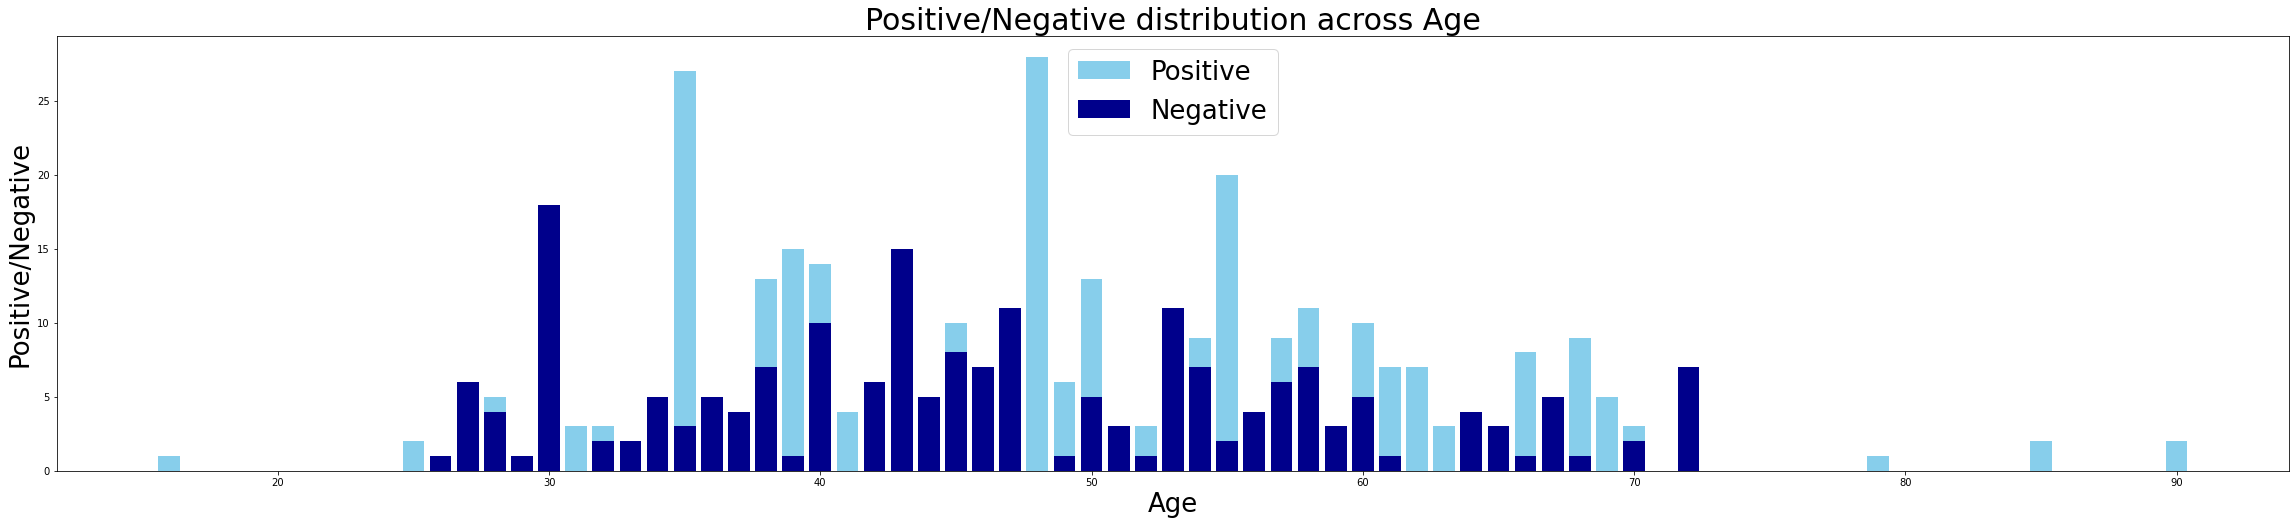

In [ ]:
Class_dict={}
for Class in df['class'].value_counts().index:
    Class_dict[Class]=df[df['class']==Class]['Age'].value_counts()
Class_df=pd.DataFrame(Class_dict)
Class_df.index.rename("Age",inplace=True)
#display(polyuria_df)     #Hidden to save screen space

#this cell visualizes the Polyuria distribution across age
fig,ax1=plt.subplots(1,1,figsize=(40,8))
ax1.bar(Class_df.index,Class_df['Positive'],color="skyblue",label="Positive")
ax1.bar(Class_df.index,Class_df['Negative'],color="darkblue",label="Negative")

for index in Class_df.index:
    ax1.annotate(Class_df["Negative"].loc[index],
                 xy=(index,Class_df["Negative"].loc[index]+100),
                 ha="center",va="center",fontsize=18)
    ax1.annotate(Class_df["Positive"].loc[index],
                 xy=(index,Class_df["Positive"].loc[index]-100),
                 ha="center",va="center",fontsize=18)

plt.legend(fontsize=26)
plt.xlabel("Age",fontsize=26)
plt.ylabel("Positive/Negative",fontsize=26)
plt.title("Positive/Negative distribution across Age",fontsize=30)
plt.show()

**Pie Chart**

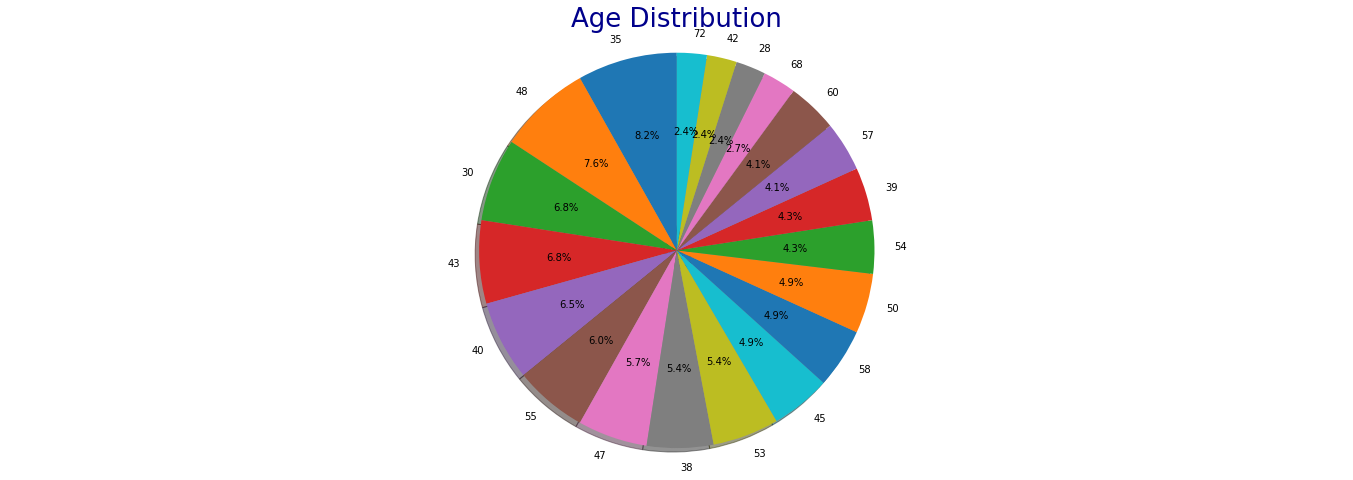

In [ ]:
#this cell plots the Age distribution using pi-chart.
df_=df['Age'].value_counts().head(20) #head() function only considers the top 20 candidates
df_

labels=df_.index
sizes=df_.values
fig,ax1=plt.subplots(1,1,figsize=(24,8))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis("equal")
plt.title("Age Distribution",fontsize=26, color="Darkblue")
plt.show()

## **Gender**

**Pie Chart**

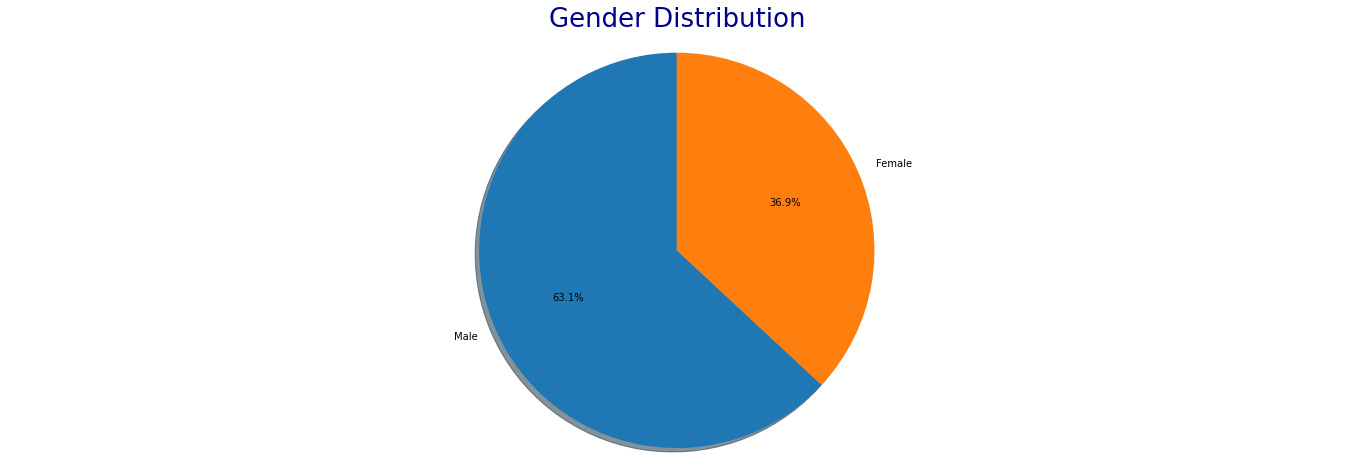

In [ ]:
df_ = df['Gender'].value_counts()
df_

labels = df_.index
sizes = df_.values
fig, ax1 = plt.subplots(1, 1, figsize = (24,8))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Gender Distribution', fontsize=26, color='Darkblue')
plt.show()

## **Polyuria**

In [ ]:
polyuria_dict={}
for polyuria in df['Polyuria'].value_counts().index:
    polyuria_dict[polyuria] = df[df['Polyuria'] == polyuria]['Age'].value_counts()
polyuria_df = pd.DataFrame(polyuria_dict)
polyuria_df.index.rename("Age",inplace=True)

**Histogram**

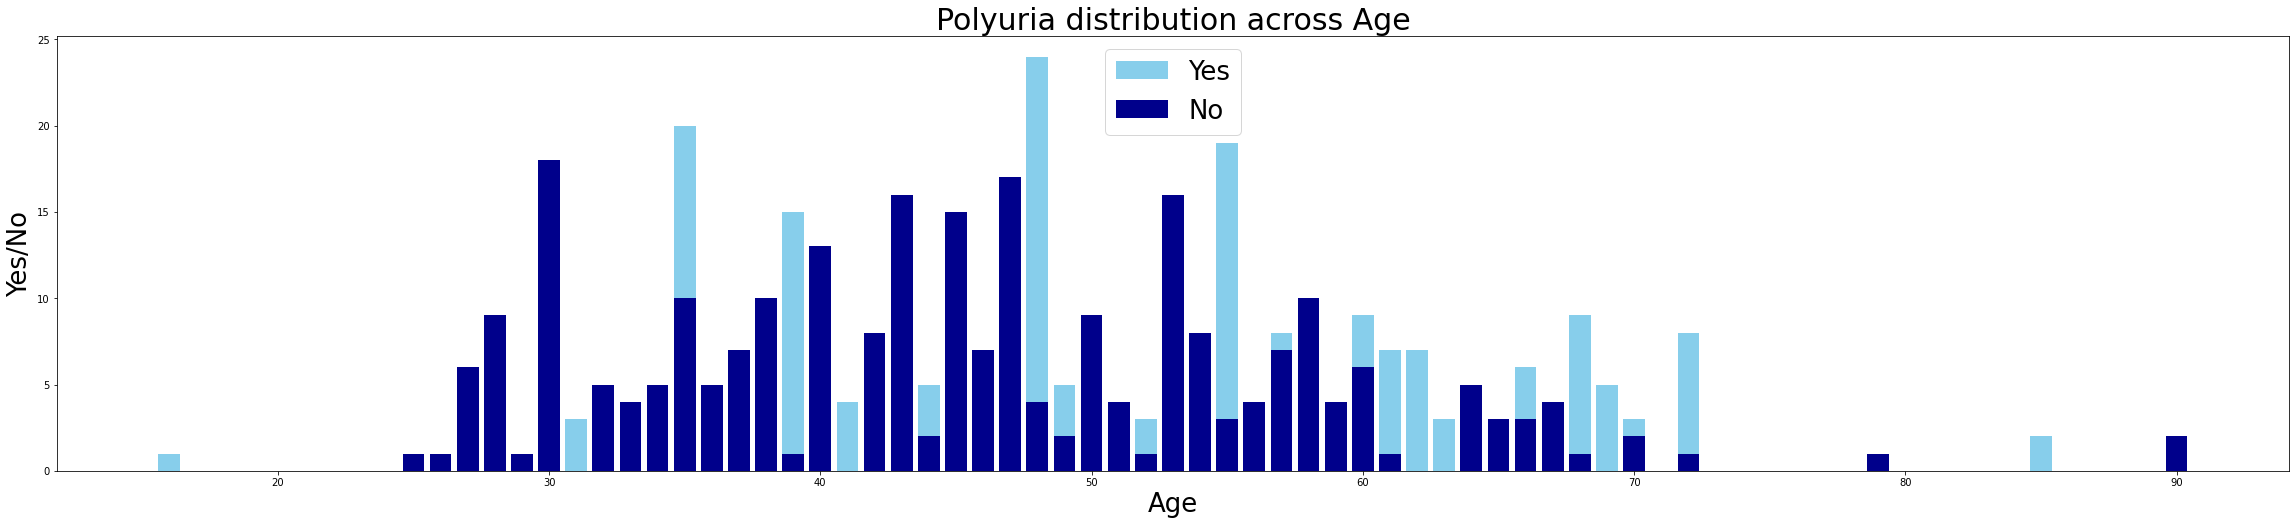

In [ ]:
#this cell visualizes the Polyuria distribution across age
fig,ax1 = plt.subplots(1, 1, figsize=(40,8))
ax1.bar(polyuria_df.index,polyuria_df['Yes'],color = "skyblue",label="Yes")
ax1.bar(polyuria_df.index,polyuria_df['No'],color = "darkblue",label="No")

for index in polyuria_df.index:
    ax1.annotate(polyuria_df["No"].loc[index],xy=(index,polyuria_df["No"].loc[index]+100),ha="center",va="center",fontsize=18)
    ax1.annotate(polyuria_df["Yes"].loc[index],xy=(index,polyuria_df["Yes"].loc[index]-100),ha="center",va="center",fontsize=18)

plt.legend(fontsize=26)
plt.xlabel("Age",fontsize=26)
plt.ylabel("Yes/No",fontsize=26)
plt.title("Polyuria distribution across Age",fontsize=30)
plt.show()

**Pie Chart**

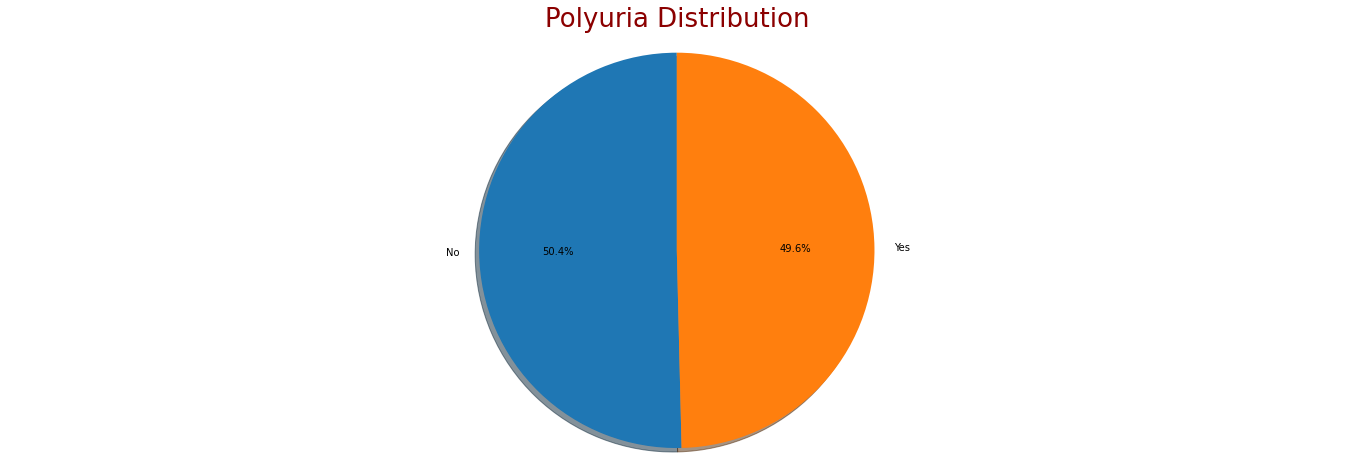

In [ ]:
df_=df['Polyuria'].value_counts()
df_

labels=df_.index
sizes=df_.values
fig,ax1=plt.subplots(1,1,figsize=(24,8))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis("equal")
plt.title("Polyuria Distribution",fontsize=26, color="Darkred")
plt.show()

## **Polydipsia**

In [ ]:
polydipsia_dict={}
for polydipsia in df['Polydipsia'].value_counts().index:
    polydipsia_dict[polydipsia] = df[df['Polydipsia'] == polydipsia]['Age'].value_counts()
polydipsia_df = pd.DataFrame(polydipsia_dict)
polydipsia_df.index.rename("Age",inplace=True)

**Histogram**

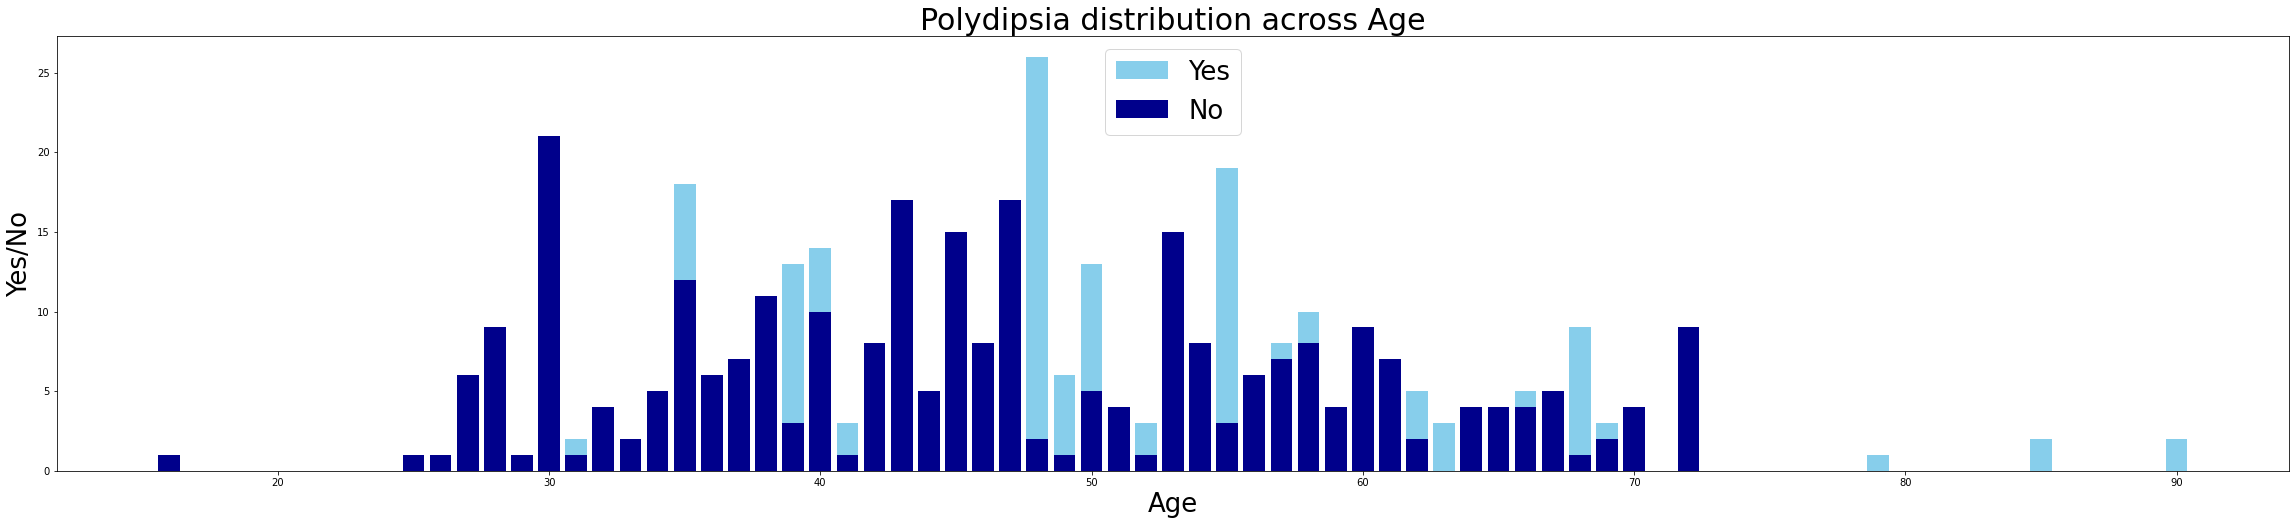

In [ ]:
fig,ax1=plt.subplots(1, 1, figsize = (40,8))
ax1.bar(polydipsia_df.index,polydipsia_df['Yes'],color = "skyblue",label="Yes")
ax1.bar(polydipsia_df.index,polydipsia_df['No'],color = "darkblue",label="No")

for index in polydipsia_df.index:
    ax1.annotate(polydipsia_df["No"].loc[index],xy = (index,polydipsia_df["No"].loc[index]+100),ha="center",va="center",fontsize=18)
    ax1.annotate(polydipsia_df["Yes"].loc[index],xy = (index,polydipsia_df["Yes"].loc[index]-100),ha="center",va="center",fontsize=18)

plt.legend(fontsize=26)
plt.xlabel("Age",fontsize=26)
plt.ylabel("Yes/No",fontsize=26)
plt.title("Polydipsia distribution across Age",fontsize=30)
plt.show()

**Pie Chart**

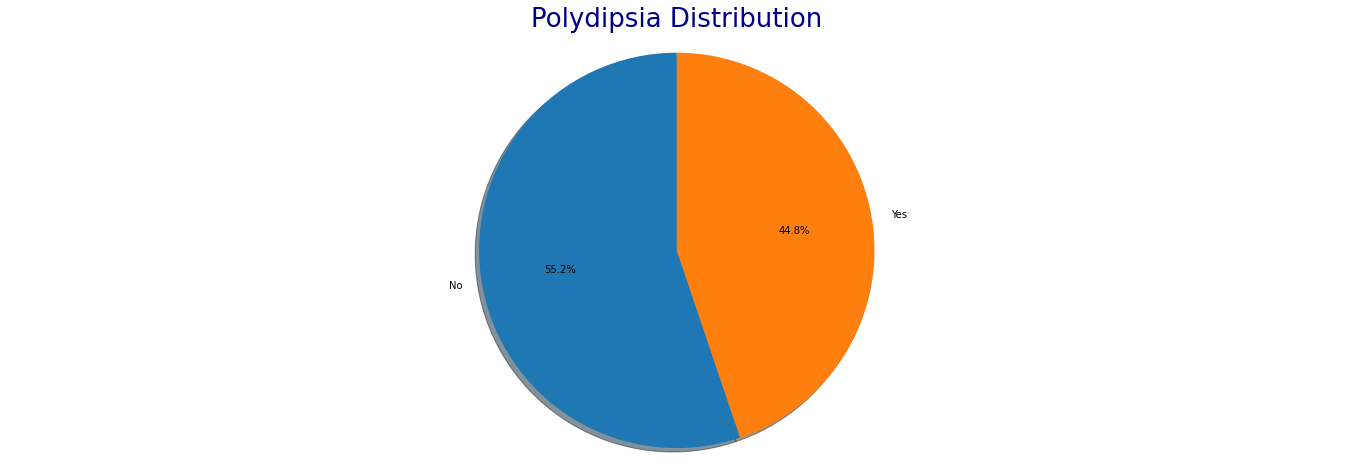

In [ ]:
df_=df['Polydipsia'].value_counts()
df_

labels=df_.index
sizes=df_.values
fig,ax1=plt.subplots(1,1,figsize=(24,8))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis("equal")
plt.title("Polydipsia Distribution",fontsize=26, color="Darkblue")
plt.show()

## **Weight Loss**

In [ ]:
weight_loss_dict={}
for weight_loss in df['sudden weight loss'].value_counts().index:
    weight_loss_dict[weight_loss]=df[df['sudden weight loss']==weight_loss]['Age'].value_counts()
weight_loss_df=pd.DataFrame(weight_loss_dict)
weight_loss_df.index.rename("Age",inplace=True)

**Histogram**

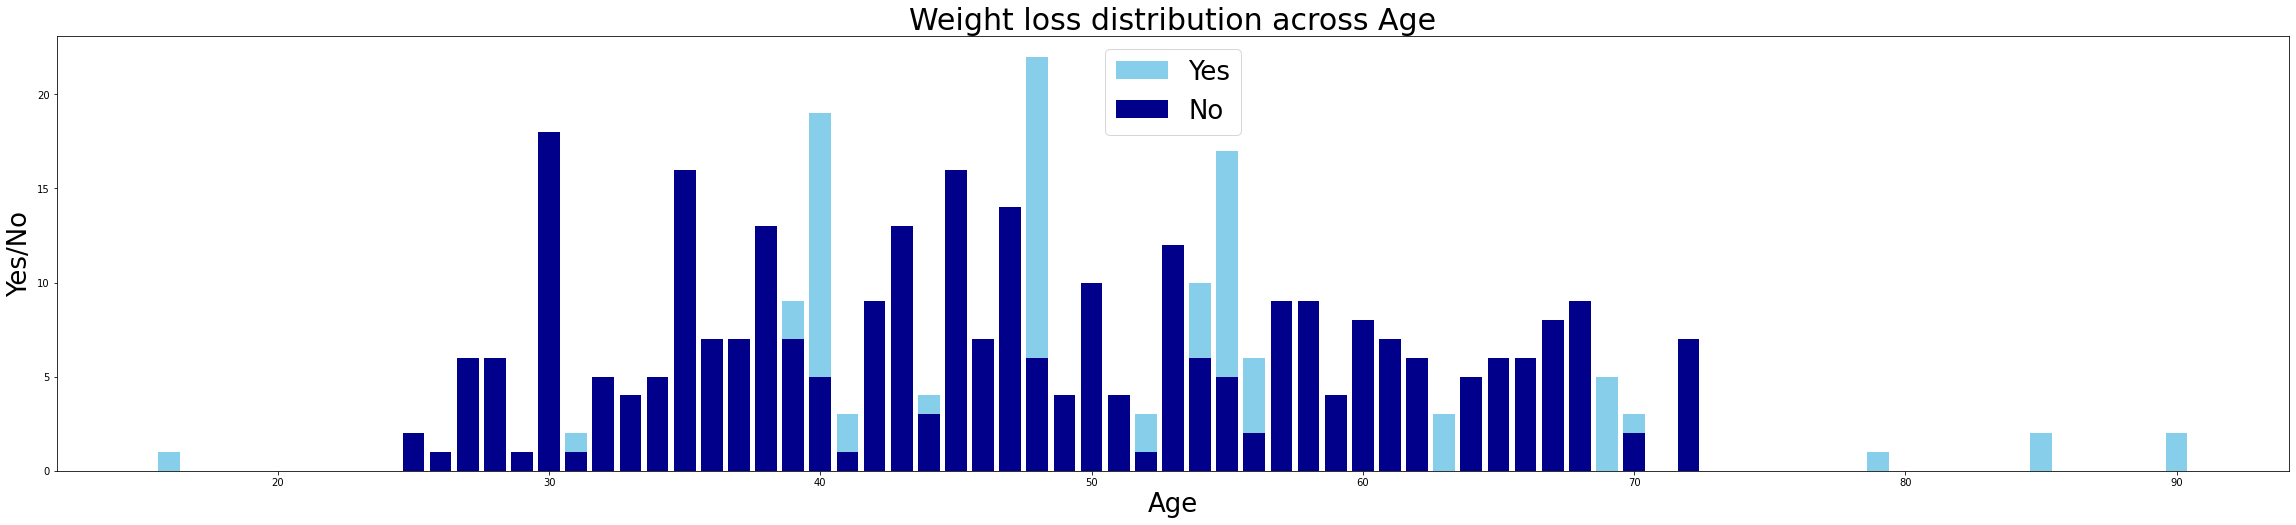

In [ ]:
fig,ax1=plt.subplots(1,1,figsize=(40,8))
ax1.bar(weight_loss_df.index,weight_loss_df['Yes'],color="skyblue",label="Yes")
ax1.bar(weight_loss_df.index,weight_loss_df['No'],color="darkblue",label="No")

for index in weight_loss_df.index:
    ax1.annotate(weight_loss_df["No"].loc[index],xy=(index,weight_loss_df["No"].loc[index]+100),ha="center",va="center",fontsize=18)
    ax1.annotate(weight_loss_df["Yes"].loc[index],xy=(index,weight_loss_df["Yes"].loc[index]-100),ha="center",va="center",fontsize=18)

plt.legend(fontsize=26)
plt.xlabel("Age",fontsize=26)
plt.ylabel("Yes/No",fontsize=26)
plt.title("Weight loss distribution across Age",fontsize=30)
plt.show()

**Pie Chart**

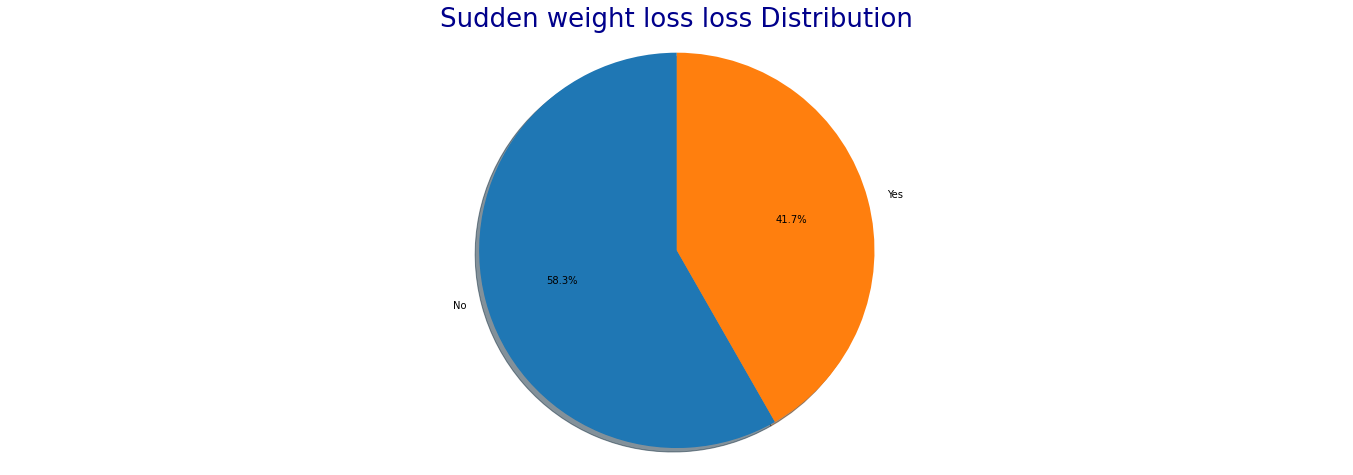

In [ ]:
df_=df['sudden weight loss'].value_counts()
df_

labels=df_.index
sizes=df_.values
fig,ax1=plt.subplots(1,1,figsize=(24,8))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis("equal")
plt.title("Sudden weight loss loss Distribution",fontsize=26, color="Darkblue")
plt.show()

## **Weakness**

In [ ]:
weakness_dict={}
for weakness_ in df['weakness'].value_counts().index:
    weakness_dict[weakness_]=df[df['weakness']==weakness_]['Age'].value_counts()
weakness_df=pd.DataFrame(weakness_dict)
weakness_df.index.rename("Age",inplace=True)

**Histogram**

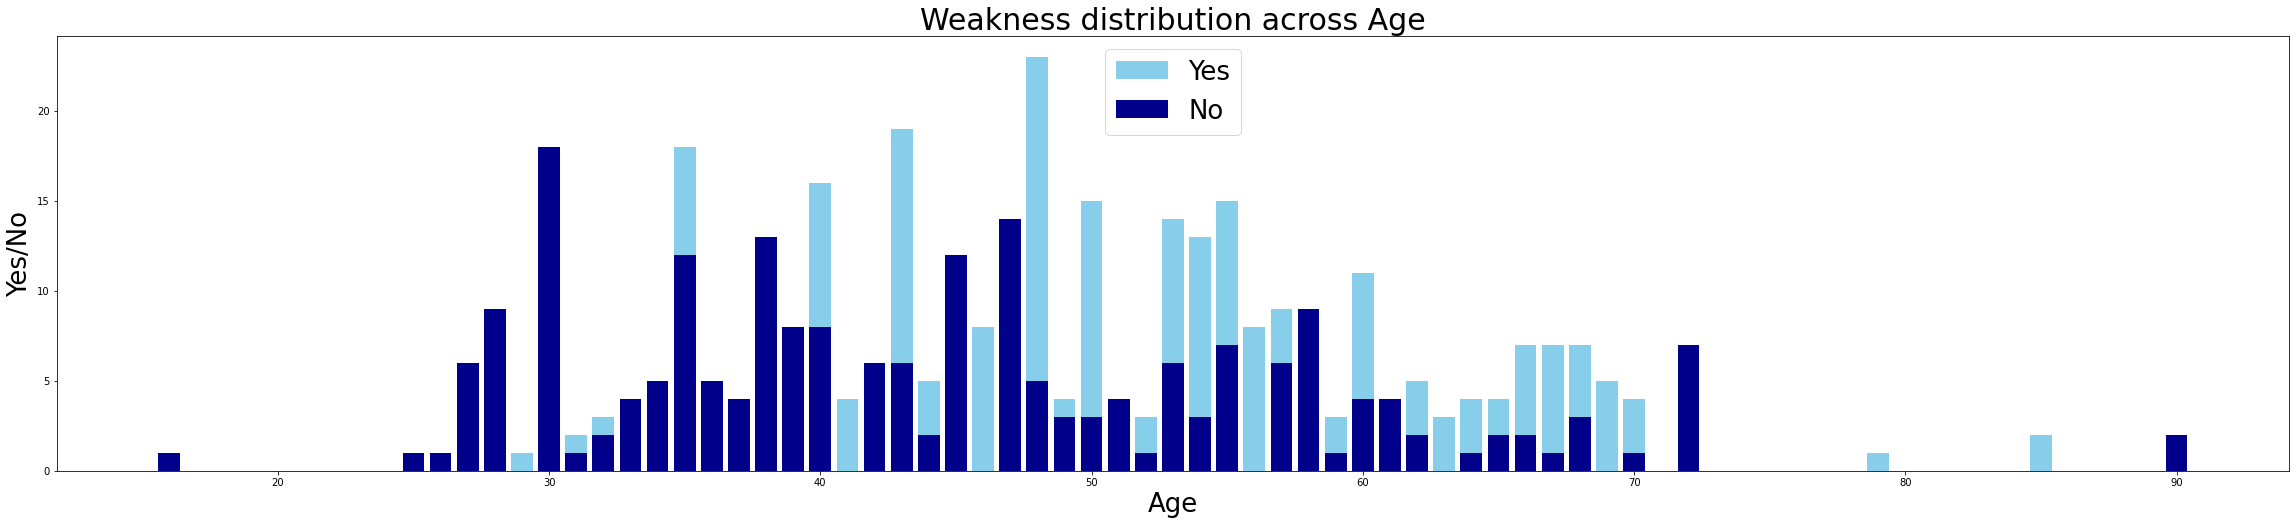

In [ ]:
fig,ax1=plt.subplots(1,1,figsize=(40,8))
ax1.bar(weakness_df.index,weakness_df['Yes'],color="skyblue",label="Yes")
ax1.bar(weakness_df.index,weakness_df['No'],color="darkblue",label="No")

for index in weakness_df.index:
    ax1.annotate(weakness_df["No"].loc[index],xy=(index,weakness_df["No"].loc[index]+100),ha="center",va="center",fontsize=18)
    ax1.annotate(weakness_df["Yes"].loc[index],xy=(index,weakness_df["Yes"].loc[index]-100),ha="center",va="center",fontsize=18)

plt.legend(fontsize=26)
plt.xlabel("Age",fontsize=26)
plt.ylabel("Yes/No",fontsize=26)
plt.title("Weakness distribution across Age",fontsize=30)
plt.show()

**Pie Chart**

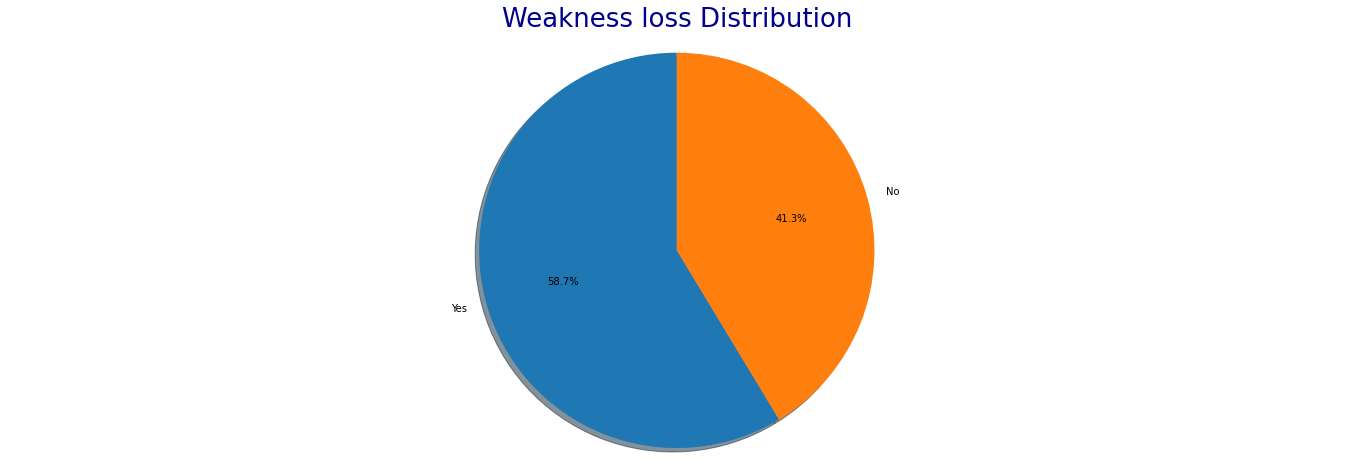

In [ ]:
df_=df['weakness'].value_counts()
df_

labels=df_.index
sizes=df_.values
fig,ax1=plt.subplots(1,1,figsize=(24,8))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis("equal")
plt.title("Weakness loss Distribution",fontsize=26, color="Darkblue")
plt.show()

## **Polyphagia**

In [ ]:
polyphagia_dict={}
for polyphagia_ in df['Polyphagia'].value_counts().index:
    polyphagia_dict[polyphagia_]=df[df['Polyphagia']==polyphagia_]['Age'].value_counts()
polyphagia_df=pd.DataFrame(polyphagia_dict)
polyphagia_df.index.rename("Age",inplace=True)

**Histogram**

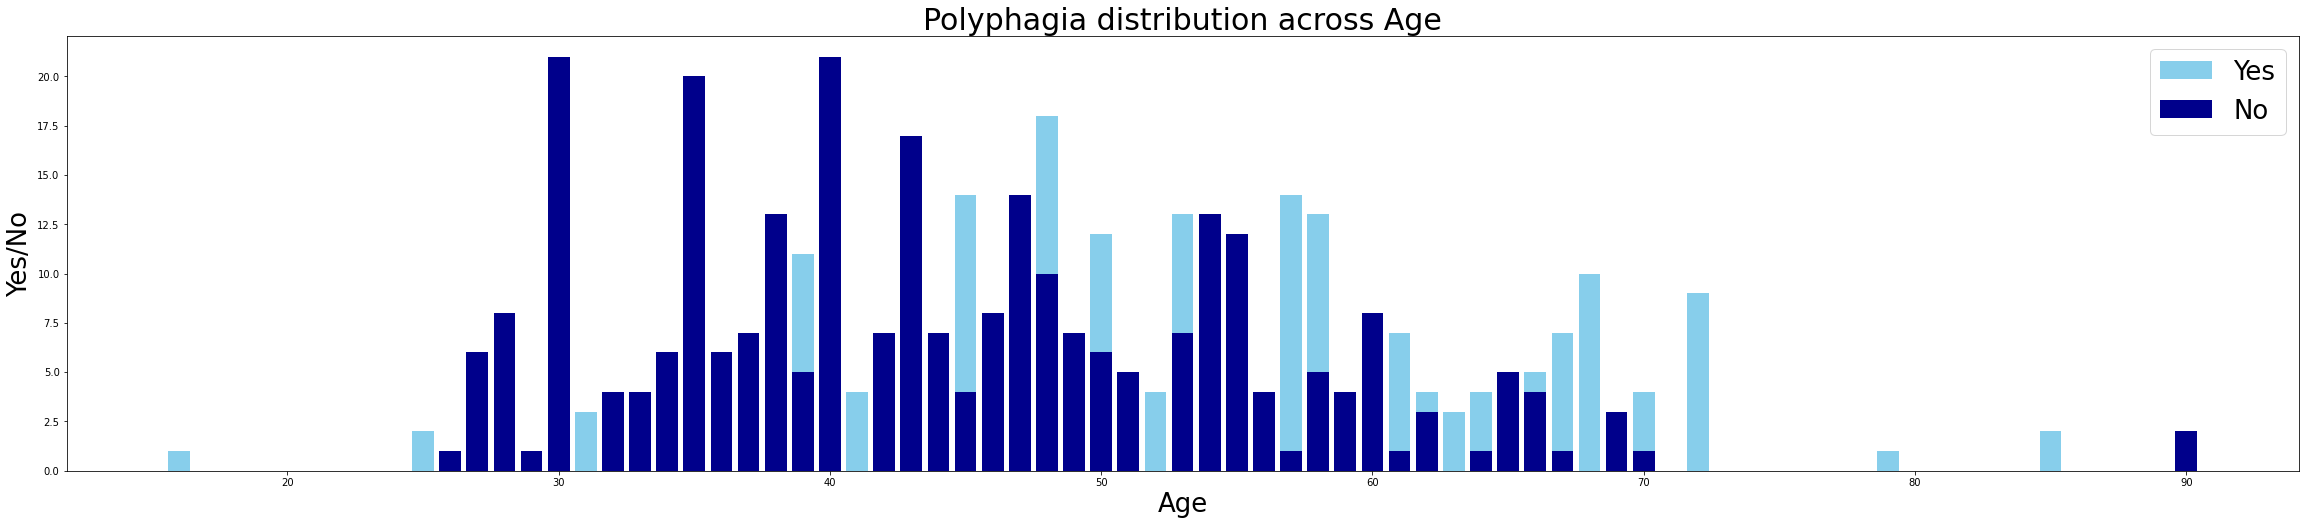

In [ ]:
fig,ax1=plt.subplots(1,1,figsize=(40,8))
ax1.bar(polyphagia_df.index,polyphagia_df['Yes'],color="skyblue",label="Yes")
ax1.bar(polyphagia_df.index,polyphagia_df['No'],color="darkblue" ,label="No")

for index in polyphagia_df.index:
    ax1.annotate(polyphagia_df["No"].loc[index],xy=(index,polyphagia_df["No"].loc[index]+100),ha="center",va="center",fontsize=18)
    ax1.annotate(polyphagia_df["Yes"].loc[index],xy=(index,polyphagia_df["Yes"].loc[index]-100),ha="center",va="center",fontsize=18)

plt.legend(fontsize=26)
plt.xlabel("Age",fontsize=26)
plt.ylabel("Yes/No",fontsize=26)
plt.title("Polyphagia distribution across Age",fontsize=30)
plt.show()


**Pie Chart**

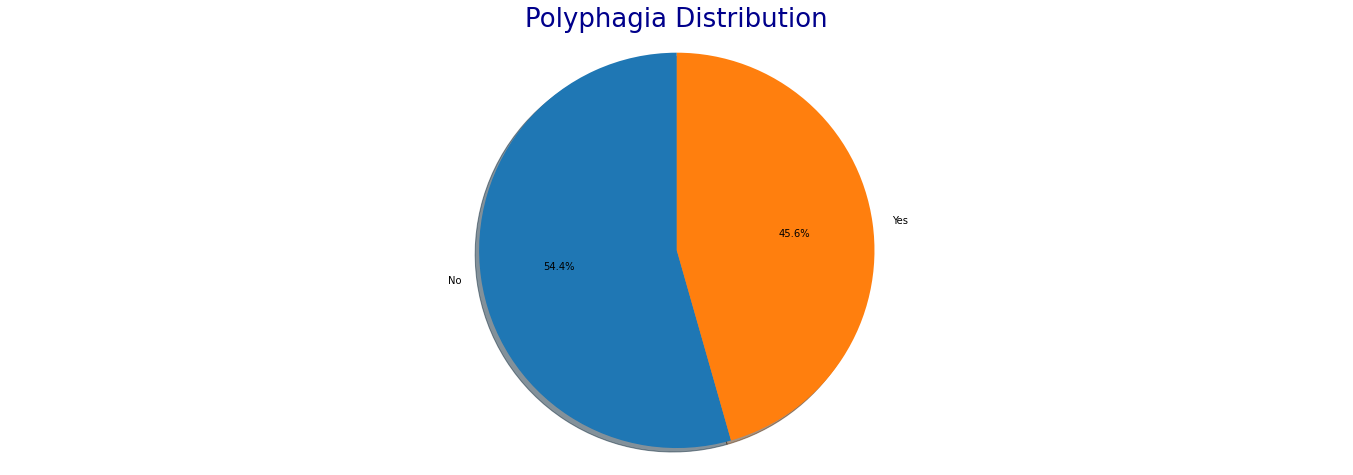

In [ ]:
df_=df['Polyphagia'].value_counts()
df_

labels=df_.index
sizes=df_.values
fig,ax1=plt.subplots(1,1,figsize=(24,8))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis("equal")
plt.title("Polyphagia Distribution",fontsize=26, color="Darkblue")
plt.show()

## **Genital Thrush**

In [ ]:
genital_thrush_dict={}
for genital_thrush_ in df['Genital thrush'].value_counts().index:
    genital_thrush_dict[genital_thrush_] = df[df['Genital thrush'] == genital_thrush_]['Age'].value_counts()
genital_thrush_df = pd.DataFrame(genital_thrush_dict)
genital_thrush_df.index.rename("Age",inplace=True)

**Histogram**

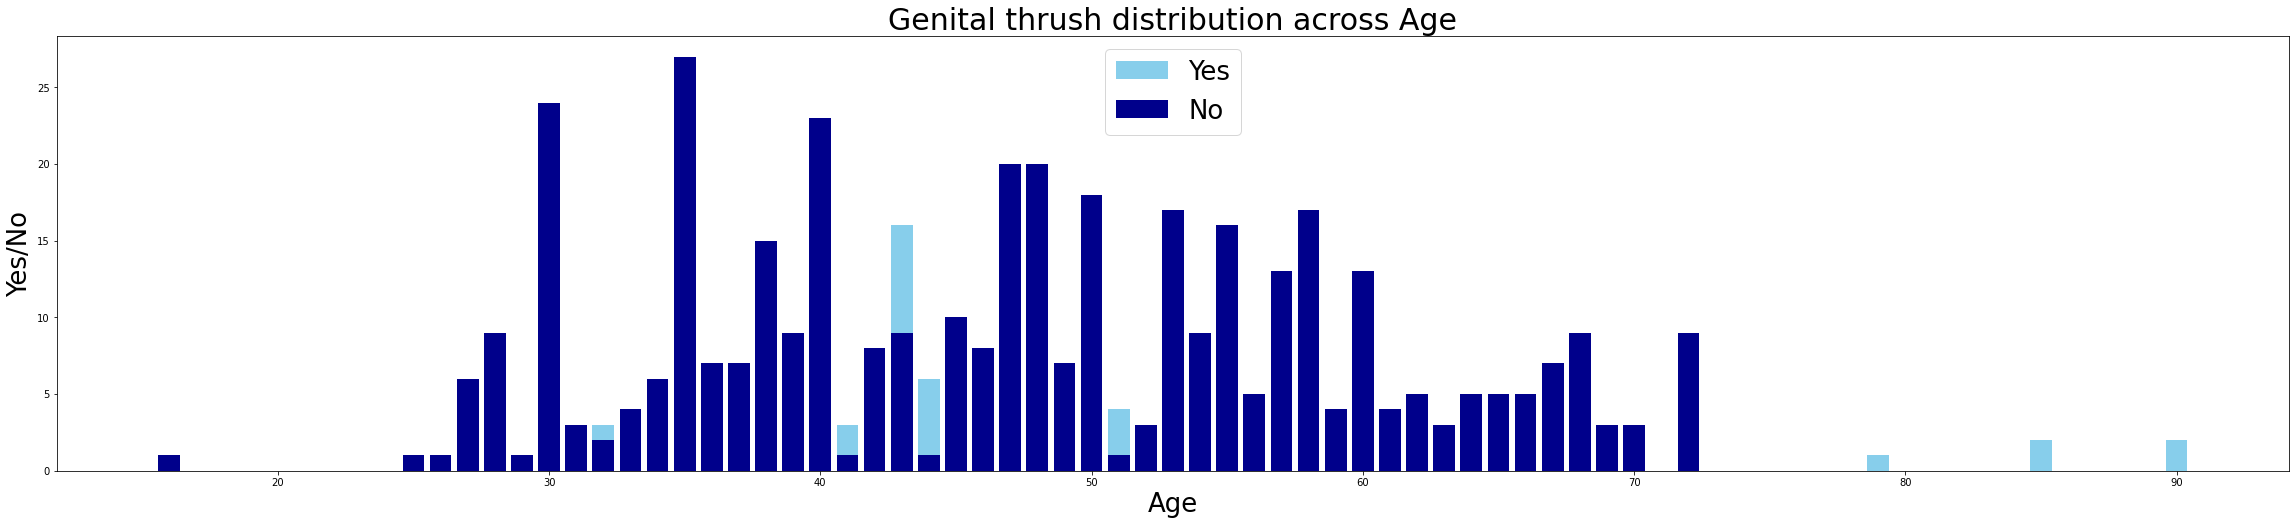

In [ ]:
fig,ax1=plt.subplots(1,1,figsize=(40,8))
ax1.bar(genital_thrush_df.index,genital_thrush_df['Yes'],color="skyblue",label="Yes")
ax1.bar(genital_thrush_df.index,genital_thrush_df['No'],color="darkblue",label="No")

for index in genital_thrush_df.index:
    ax1.annotate(genital_thrush_df["No"].loc[index],xy=(index,genital_thrush_df["No"].loc[index]+100),ha="center",va="center",fontsize=18)
    ax1.annotate(genital_thrush_df["Yes"].loc[index],xy=(index,genital_thrush_df["Yes"].loc[index]-100),ha="center",va="center",fontsize=18)

plt.legend(fontsize=26)
plt.xlabel("Age",fontsize=26)
plt.ylabel("Yes/No",fontsize=26)
plt.title("Genital thrush distribution across Age",fontsize=30)
plt.show()

**Pie Chart**

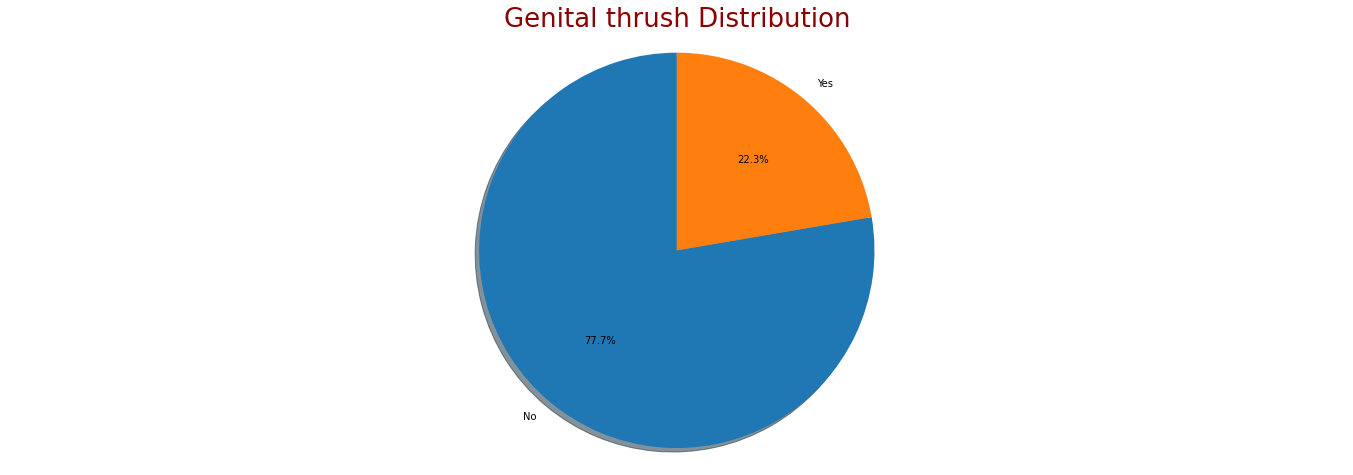

In [ ]:
df_=df['Genital thrush'].value_counts()
df_

labels=df_.index
sizes=df_.values
fig,ax1=plt.subplots(1,1,figsize=(24,8))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis("equal")
plt.title("Genital thrush Distribution",fontsize=26, color="Darkred")
plt.show()

## **Visual Blurring**

In [ ]:
visual_blurring_dict={}
for visual_blurring_ in df['visual blurring'].value_counts().index:
    visual_blurring_dict[visual_blurring_] = df[df['visual blurring'] == visual_blurring_]['Age'].value_counts()
visual_blurring_df = pd.DataFrame(visual_blurring_dict)
visual_blurring_df.index.rename("Age",inplace=True)

**Histogram**

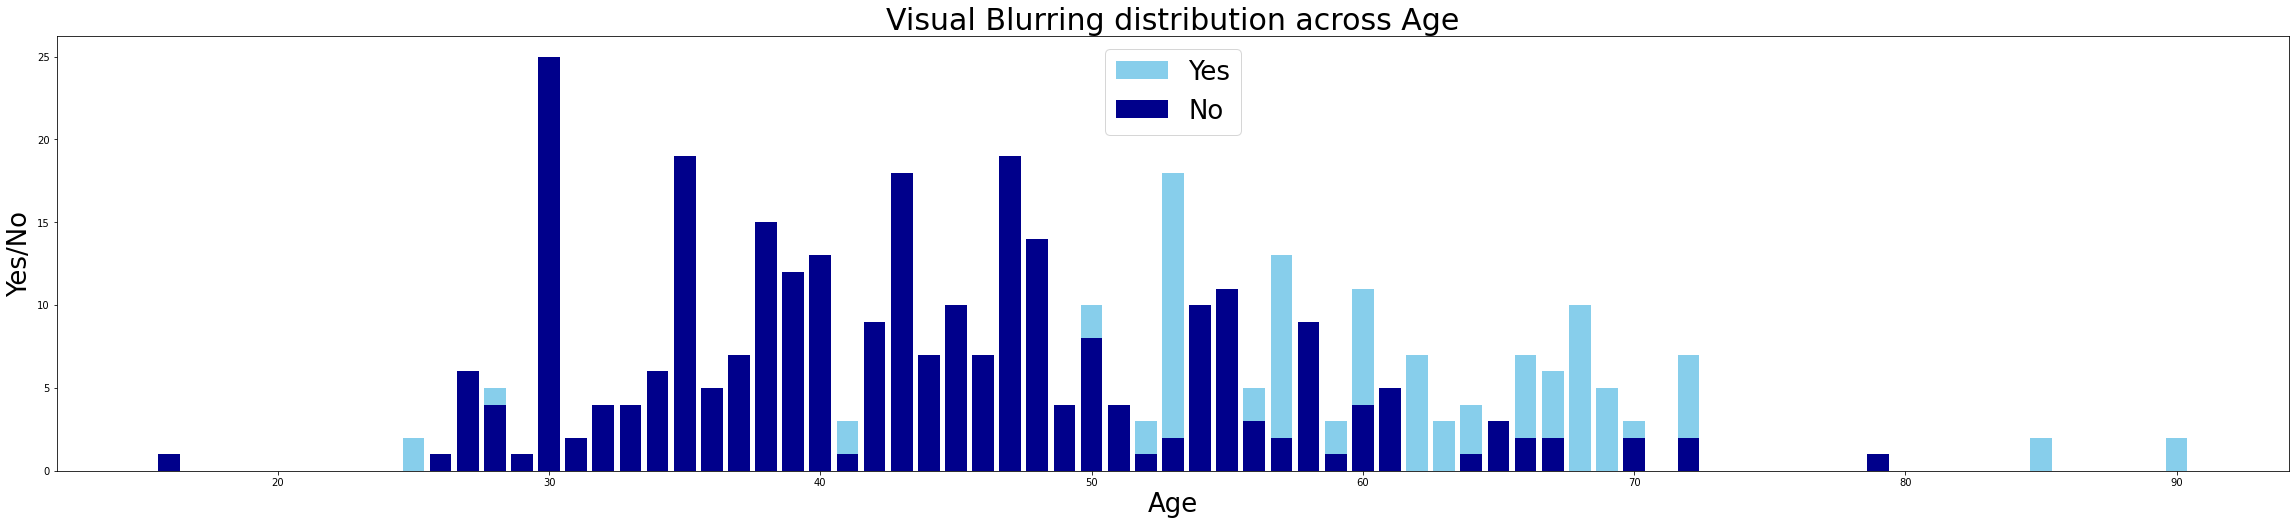

In [ ]:
fig,ax1=plt.subplots(1,1,figsize=(40,8))
ax1.bar(visual_blurring_df.index,visual_blurring_df['Yes'],color="skyblue",label="Yes")
ax1.bar(visual_blurring_df.index,visual_blurring_df['No'],color="darkblue",label="No")

for index in visual_blurring_df.index:
    ax1.annotate(visual_blurring_df["No"].loc[index],xy=(index,visual_blurring_df["No"].loc[index]+100),ha="center",va="center",fontsize=18)
    ax1.annotate(visual_blurring_df["Yes"].loc[index],xy=(index,visual_blurring_df["Yes"].loc[index]-100),ha="center",va="center",fontsize=18)

plt.legend(fontsize=26)
plt.xlabel("Age",fontsize=26)
plt.ylabel("Yes/No",fontsize=26)
plt.title("Visual Blurring distribution across Age",fontsize=30)
plt.show()

**Pie Chart**

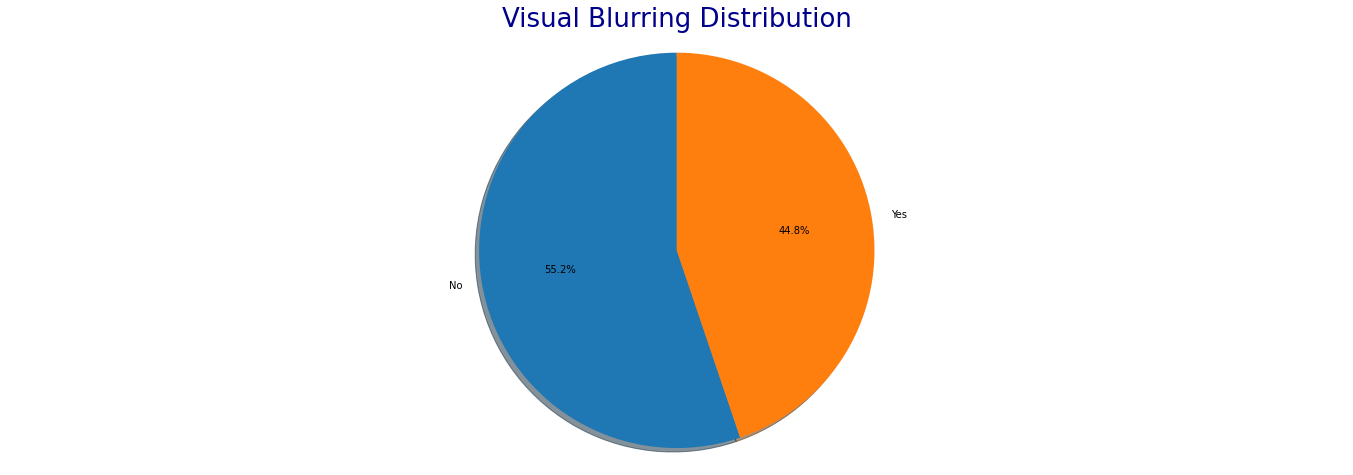

In [ ]:
df_=df['visual blurring'].value_counts()
df_

labels=df_.index
sizes=df_.values
fig,ax1=plt.subplots(1,1,figsize=(24,8))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis("equal")
plt.title("Visual Blurring Distribution",fontsize=26, color="Darkblue")
plt.show()

## **Itching**

In [ ]:
itching_dict={}
for itching_ in df['Itching'].value_counts().index:
    itching_dict[itching_]=df[df['Itching']==itching_]['Age'].value_counts()
itching_df=pd.DataFrame(itching_dict)
itching_df.index.rename("Age",inplace=True)

**Histogram**

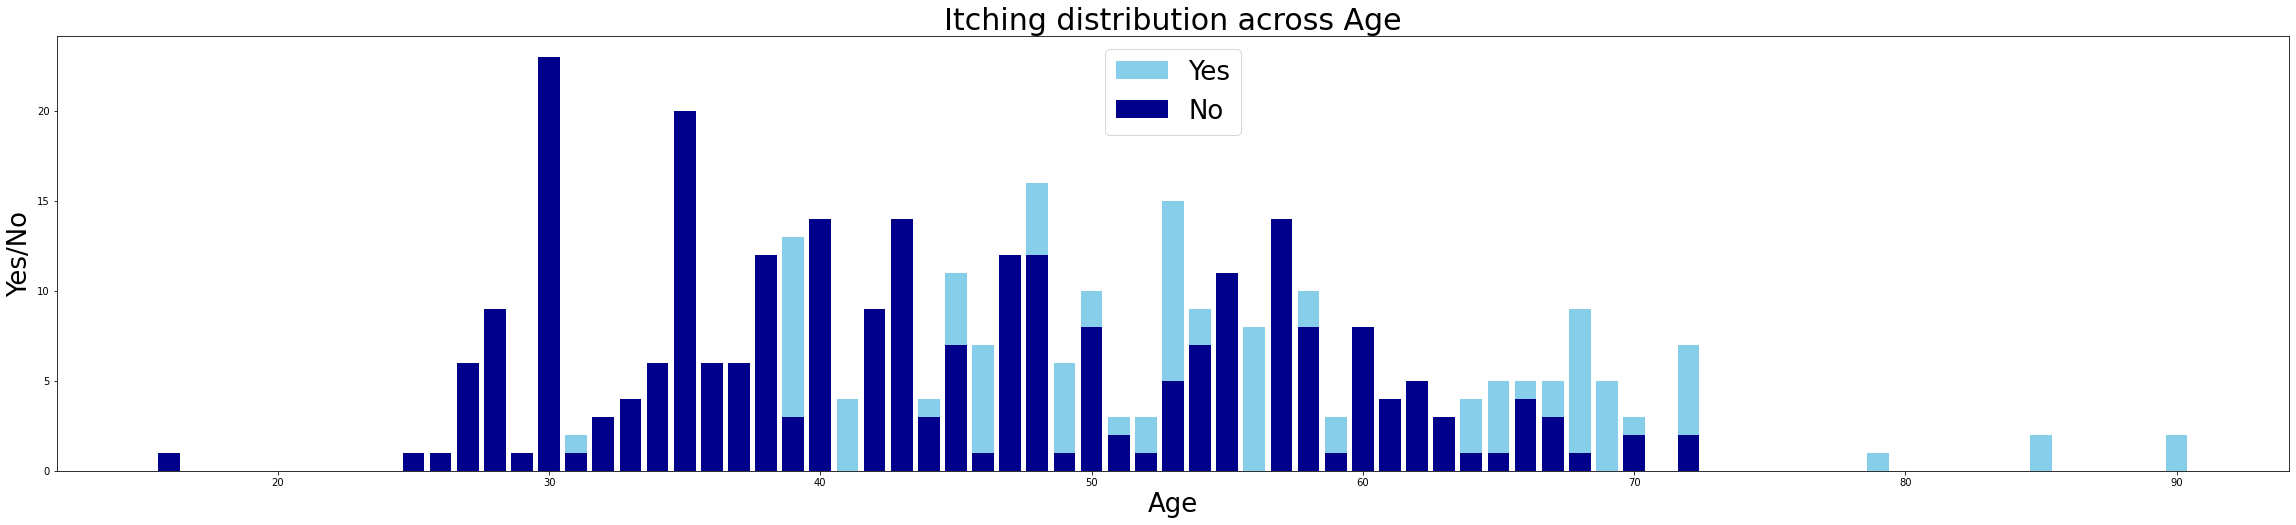

In [ ]:
fig,ax1=plt.subplots(1,1,figsize=(40,8))
ax1.bar(itching_df.index,itching_df['Yes'],color="skyblue",label="Yes")
ax1.bar(itching_df.index,itching_df['No'],color="darkblue",label="No")

for index in itching_df.index:
    ax1.annotate(itching_df["No"].loc[index],xy=(index,itching_df["No"].loc[index]+100),ha="center",va="center",fontsize=18)
    ax1.annotate(itching_df["Yes"].loc[index],xy=(index,itching_df["Yes"].loc[index]-100),ha="center",va="center",fontsize=18)

plt.legend(fontsize=26)
plt.xlabel("Age",fontsize=26)
plt.ylabel("Yes/No",fontsize=26)
plt.title("Itching distribution across Age",fontsize=30)
plt.show()

**Pie Chart**

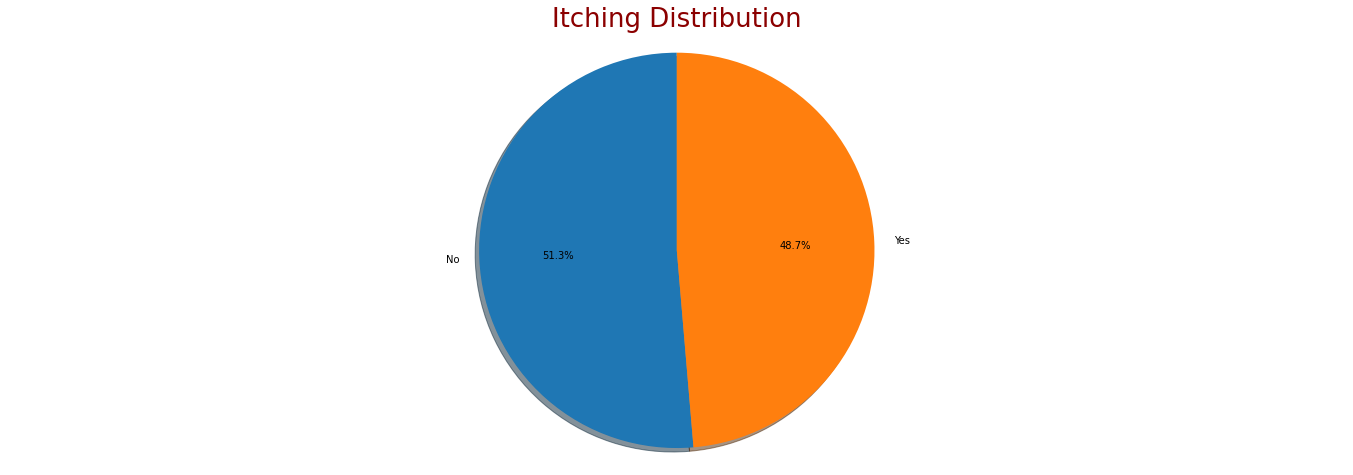

In [ ]:
df_=df['Itching'].value_counts()
df_

labels=df_.index
sizes=df_.values
fig,ax1=plt.subplots(1,1,figsize=(24,8))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis("equal")
plt.title("Itching Distribution",fontsize=26, color="Darkred")
plt.show()

## **Irritability**

In [ ]:
irritability_dict={}
for irritability_ in df['Irritability'].value_counts().index:
    irritability_dict[irritability_]=df[df['Irritability']==irritability_]['Age'].value_counts()
irritability_df=pd.DataFrame(irritability_dict)
irritability_df.index.rename("Age",inplace=True)

**Histogram**

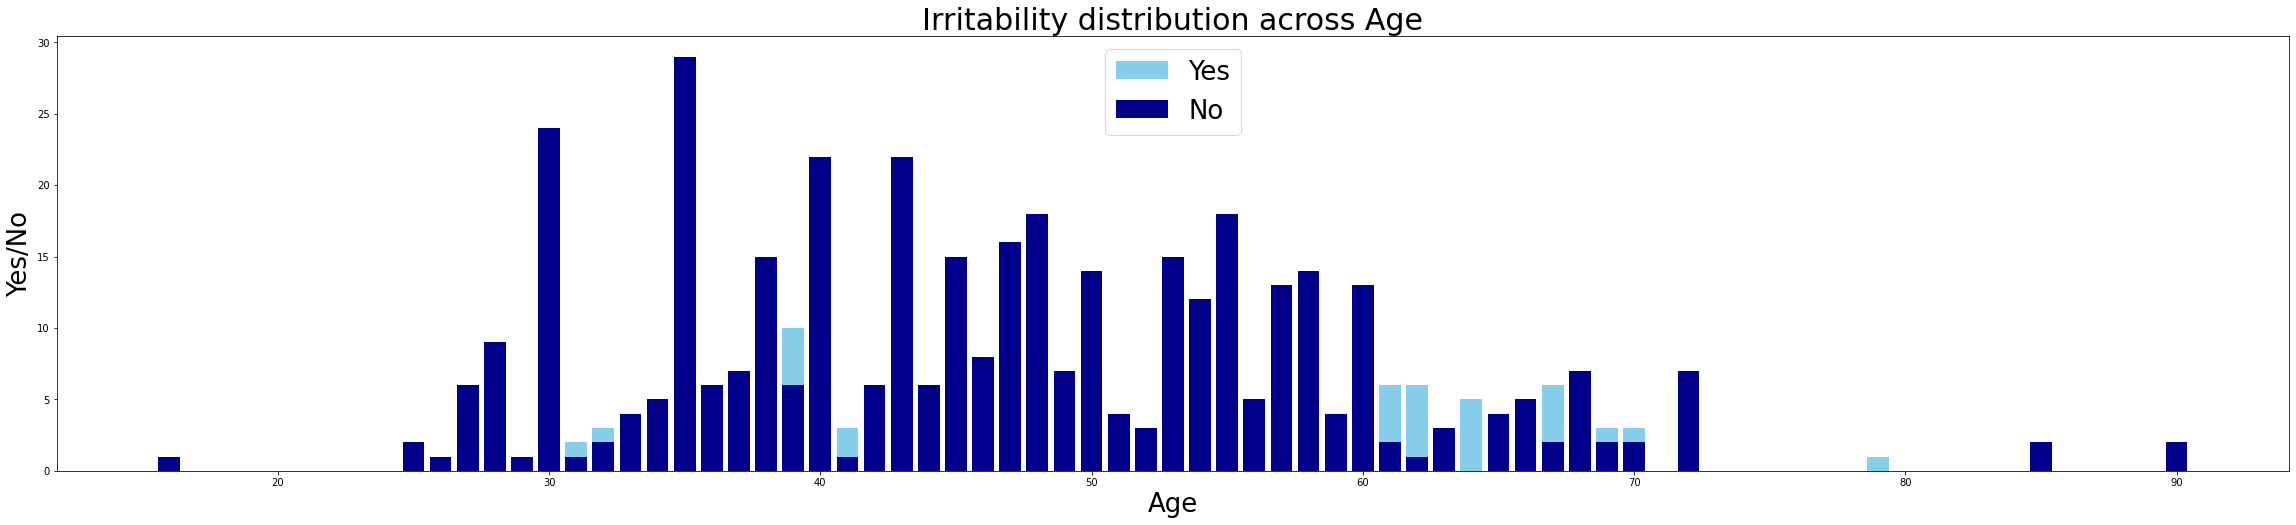

In [ ]:
fig,ax1=plt.subplots(1,1,figsize=(40,8))
ax1.bar(irritability_df.index,irritability_df['Yes'],color="skyblue",label="Yes")
ax1.bar(irritability_df.index,irritability_df['No'],color="darkblue",label="No")

for index in irritability_df.index:
    ax1.annotate(irritability_df["No"].loc[index],xy=(index,irritability_df["No"].loc[index]+100),ha="center",va="center",fontsize=18)
    ax1.annotate(irritability_df["Yes"].loc[index],xy=(index,irritability_df["Yes"].loc[index]-100),ha="center",va="center",fontsize=18)

plt.legend(fontsize=26)
plt.xlabel("Age",fontsize=26)
plt.ylabel("Yes/No",fontsize=26)
plt.title("Irritability distribution across Age",fontsize=30)
plt.show()

**Pie Chart**

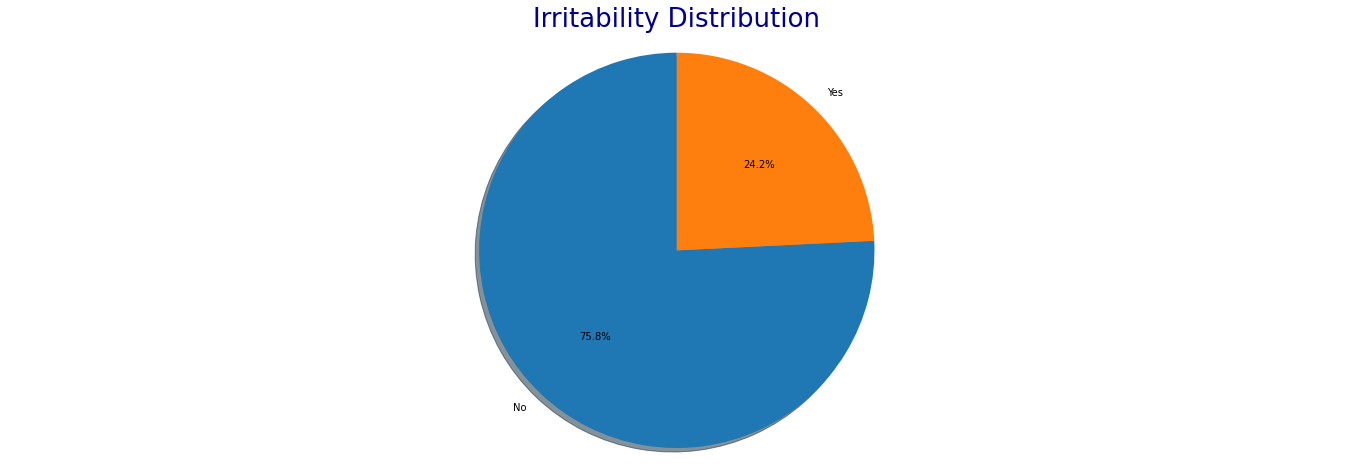

In [ ]:
df_=df['Irritability'].value_counts()
df_

labels=df_.index
sizes=df_.values
fig,ax1=plt.subplots(1,1,figsize=(24,8))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis("equal")
plt.title("Irritability Distribution",fontsize=26, color="Darkblue")
plt.show()

## **Delayed Healing**

In [ ]:
delayed_healing_dict={}
for delayed_healing_ in df['delayed healing'].value_counts().index:
    delayed_healing_dict[delayed_healing_]=df[df['delayed healing']==delayed_healing_]['Age'].value_counts()
delayed_healing_df=pd.DataFrame(delayed_healing_dict)
delayed_healing_df.index.rename("Age",inplace=True)

**Histogram**

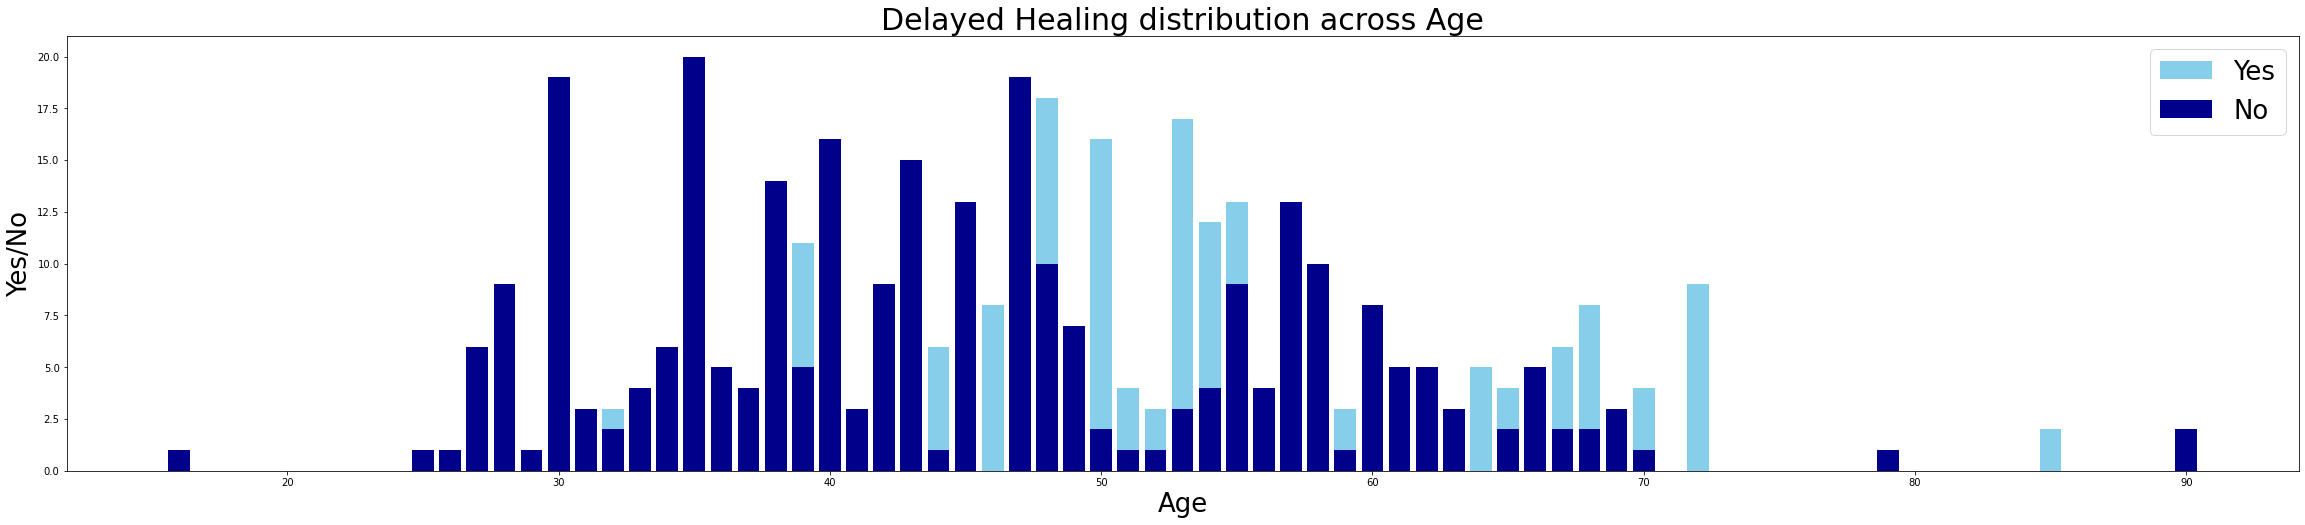

In [ ]:
fig,ax1=plt.subplots(1,1,figsize=(40,8))
ax1.bar(delayed_healing_df.index,delayed_healing_df['Yes'],color="skyblue",label="Yes")
ax1.bar(delayed_healing_df.index,delayed_healing_df['No'],color="darkblue",label="No")

for index in delayed_healing_df.index:
    ax1.annotate(delayed_healing_df["No"].loc[index],xy=(index,delayed_healing_df["No"].loc[index]+100),ha="center",va="center",fontsize=18)
    ax1.annotate(delayed_healing_df["Yes"].loc[index],xy=(index,delayed_healing_df["Yes"].loc[index]-100),ha="center",va="center",fontsize=18)

plt.legend(fontsize=26)
plt.xlabel("Age",fontsize=26)
plt.ylabel("Yes/No",fontsize=26)
plt.title("Delayed Healing distribution across Age",fontsize=30)
plt.show()

**Pie Chart**

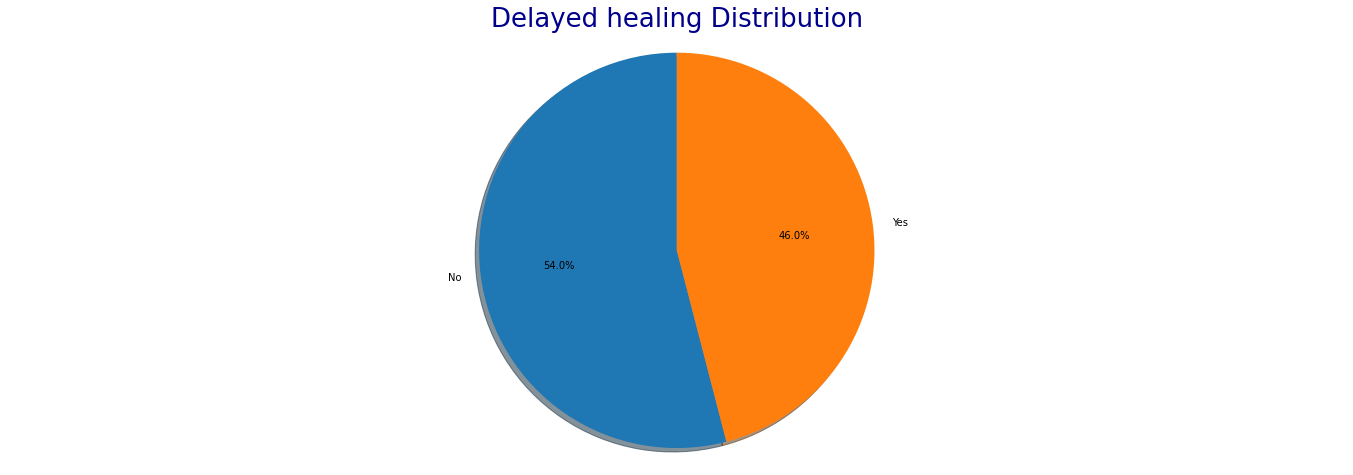

In [ ]:
df_=df['delayed healing'].value_counts()
df_

labels=df_.index
sizes=df_.values
fig,ax1=plt.subplots(1,1,figsize=(24,8))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis("equal")
plt.title("Delayed healing Distribution",fontsize=26, color="Darkblue")
plt.show()

## **Partial Paresis**

In [ ]:
partial_paresis_dict={}
for partial_paresis_ in df['partial paresis'].value_counts().index:
    partial_paresis_dict[partial_paresis_]=df[df['partial paresis']==partial_paresis_]['Age'].value_counts()
partial_paresis_df=pd.DataFrame(partial_paresis_dict)
partial_paresis_df.index.rename("Age",inplace=True)

**Histogram**

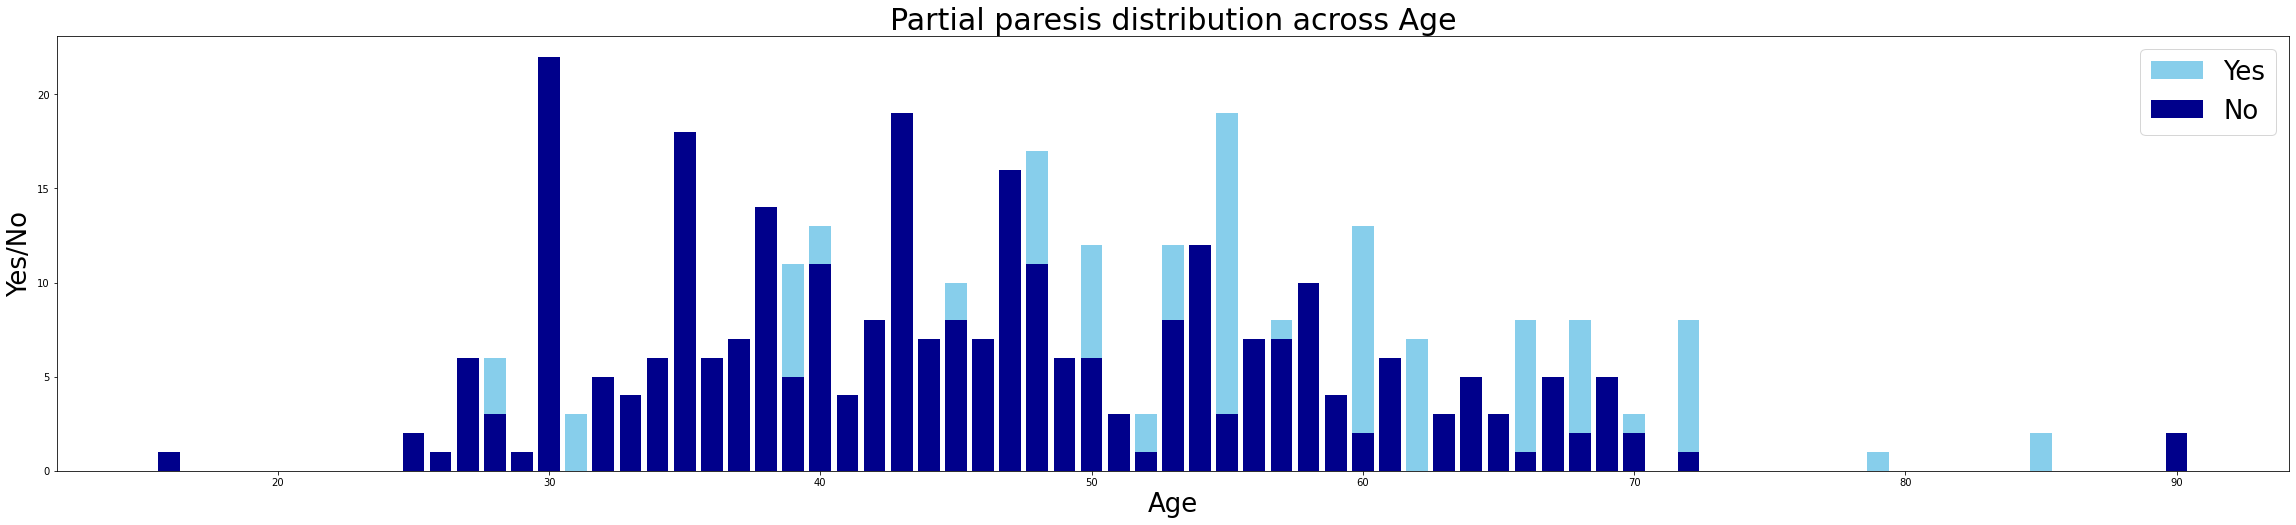

In [ ]:
fig,ax1=plt.subplots(1,1,figsize=(40,8))
ax1.bar(partial_paresis_df.index,partial_paresis_df['Yes'],color="skyblue",label="Yes")
ax1.bar(partial_paresis_df.index,partial_paresis_df['No'],color="darkblue",label="No")

for index in partial_paresis_df.index:
    ax1.annotate(partial_paresis_df["No"].loc[index],xy=(index,partial_paresis_df["No"].loc[index]+100),ha="center",va="center",fontsize=18)
    ax1.annotate(partial_paresis_df["Yes"].loc[index],xy=(index,partial_paresis_df["Yes"].loc[index]-100),ha="center",va="center",fontsize=18)

plt.legend(fontsize=26)
plt.xlabel("Age",fontsize=26)
plt.ylabel("Yes/No",fontsize=26)
plt.title("Partial paresis distribution across Age",fontsize=30)
plt.show()

**Pie Chart**

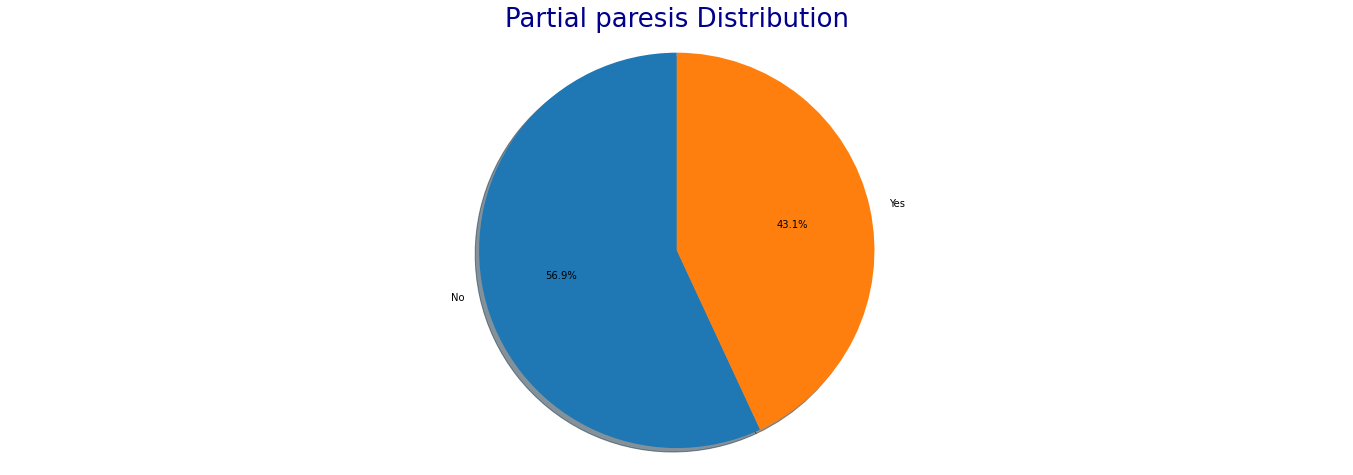

In [ ]:
df_=df['partial paresis'].value_counts()
df_

labels=df_.index
sizes=df_.values
fig,ax1=plt.subplots(1,1,figsize=(24,8))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis("equal")
plt.title("Partial paresis Distribution",fontsize=26, color="Darkblue")
plt.show()

## **Muscle Stiffness**

In [ ]:
muscle_stiffness_dict={}
for muscle_stiffness_ in df['muscle stiffness'].value_counts().index:
    muscle_stiffness_dict[muscle_stiffness_]=df[df['muscle stiffness']==muscle_stiffness_]['Age'].value_counts()
muscle_stiffness_df=pd.DataFrame(muscle_stiffness_dict)
muscle_stiffness_df.index.rename("Age",inplace=True)

**Histogram**

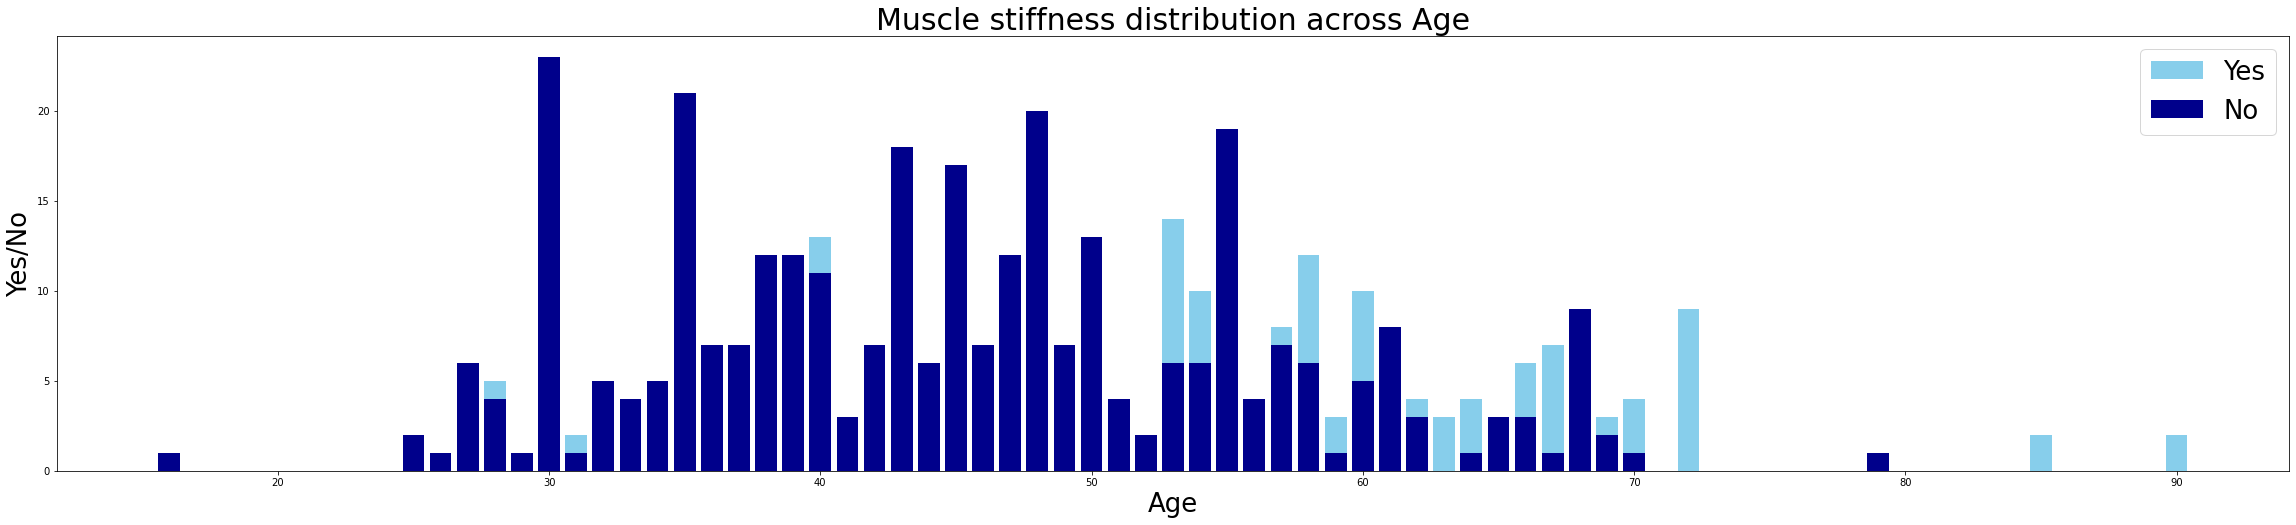

In [ ]:
fig,ax1=plt.subplots(1,1,figsize=(40,8))
ax1.bar(muscle_stiffness_df.index,muscle_stiffness_df['Yes'],color="skyblue",label="Yes")
ax1.bar(muscle_stiffness_df.index,muscle_stiffness_df['No'],color="darkblue",label="No")

for index in muscle_stiffness_df.index:
    ax1.annotate(muscle_stiffness_df["No"].loc[index],xy=(index,muscle_stiffness_df["No"].loc[index]+100),ha="center",va="center",fontsize=18)
    ax1.annotate(muscle_stiffness_df["Yes"].loc[index],xy=(index,muscle_stiffness_df["Yes"].loc[index]-100),ha="center",va="center",fontsize=18)

plt.legend(fontsize=26)
plt.xlabel("Age",fontsize=26)
plt.ylabel("Yes/No",fontsize=26)
plt.title("Muscle stiffness distribution across Age",fontsize=30)
plt.show()

**Pie Chart**

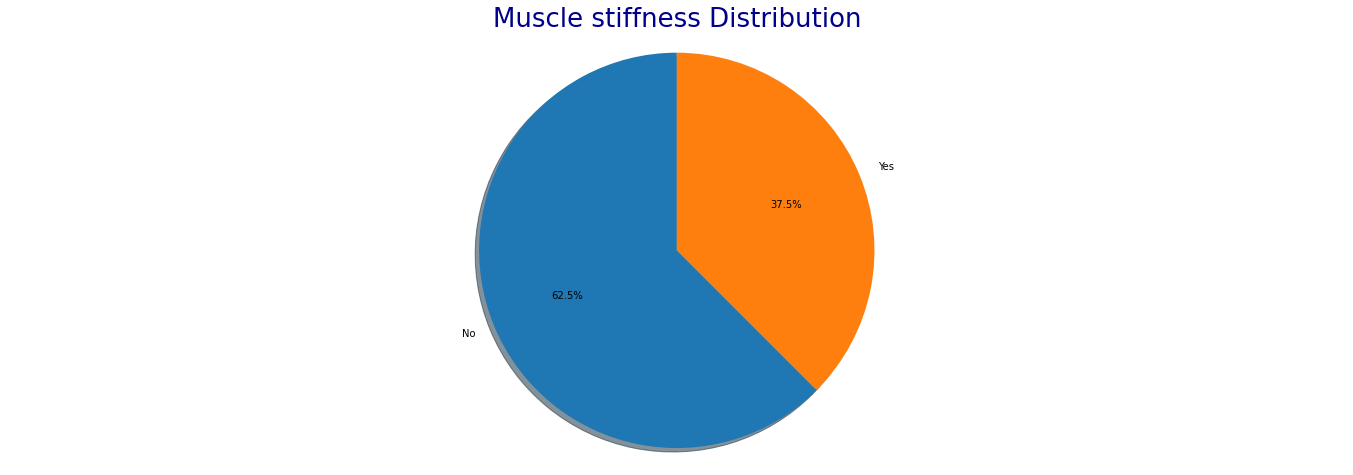

In [ ]:
df_=df['muscle stiffness'].value_counts()
df_

labels=df_.index
sizes=df_.values
fig,ax1=plt.subplots(1,1,figsize=(24,8))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis("equal")
plt.title("Muscle stiffness Distribution",fontsize=26, color="Darkblue")
plt.show()

## **Alopecia**

In [ ]:
alopecia_dict={}
for alopecia_ in df['Alopecia'].value_counts().index:
    alopecia_dict[alopecia_]=df[df['Alopecia']==alopecia_]['Age'].value_counts()
alopecia_df=pd.DataFrame(alopecia_dict)
alopecia_df.index.rename("Age",inplace=True)

**Histogram**

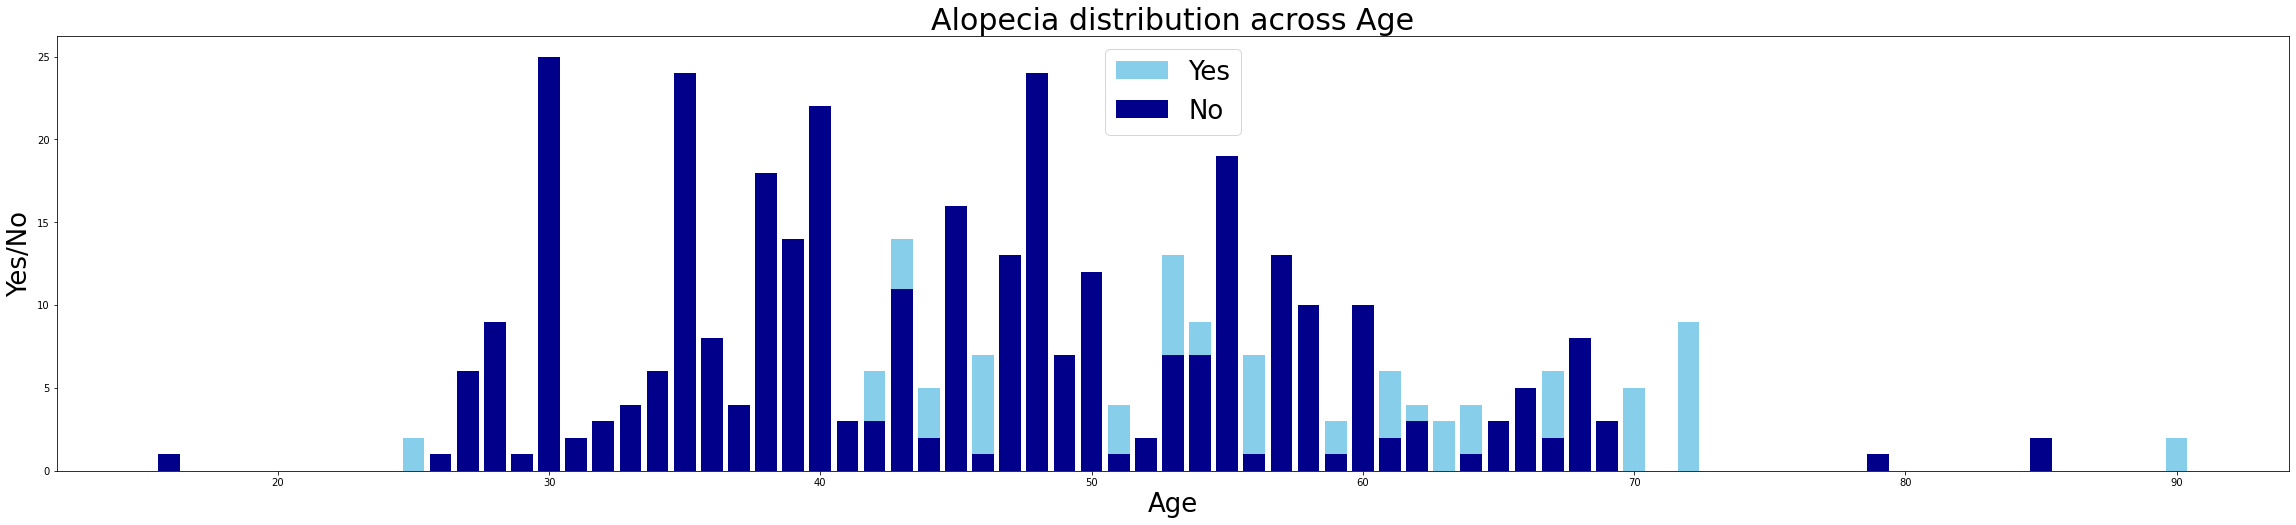

In [ ]:
fig,ax1=plt.subplots(1,1,figsize=(40,8))
ax1.bar(alopecia_df.index,alopecia_df['Yes'],color="skyblue",label="Yes")
ax1.bar(alopecia_df.index,alopecia_df['No'],color="darkblue",label="No")

for index in alopecia_df.index:
    ax1.annotate(alopecia_df["No"].loc[index],xy=(index,alopecia_df["No"].loc[index]+100),ha="center",va="center",fontsize=18)
    ax1.annotate(alopecia_df["Yes"].loc[index],xy=(index,alopecia_df["Yes"].loc[index]-100),ha="center",va="center",fontsize=18)

plt.legend(fontsize=26)
plt.xlabel("Age",fontsize=26)
plt.ylabel("Yes/No",fontsize=26)
plt.title("Alopecia distribution across Age",fontsize=30)
plt.show()

**Pie Chart**

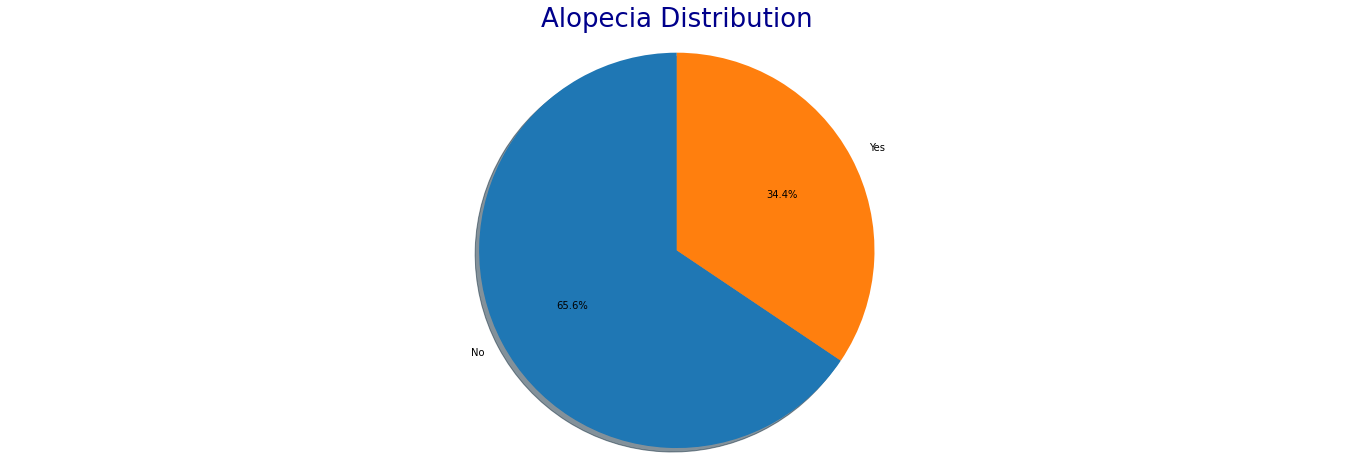

In [ ]:
df_=df['Alopecia'].value_counts()
df_

labels=df_.index
sizes=df_.values
fig,ax1=plt.subplots(1,1,figsize=(24,8))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis("equal")
plt.title("Alopecia Distribution",fontsize=26, color="Darkblue")
plt.show()

## **Obesity**

In [ ]:
Obesity_dict={}
for Obesity_ in df['Obesity'].value_counts().index:
    Obesity_dict[Obesity_]=df[df['Obesity']==Obesity_]['Age'].value_counts()
Obesity_df=pd.DataFrame(Obesity_dict)
Obesity_df.index.rename("Age",inplace=True)

**Histogram**

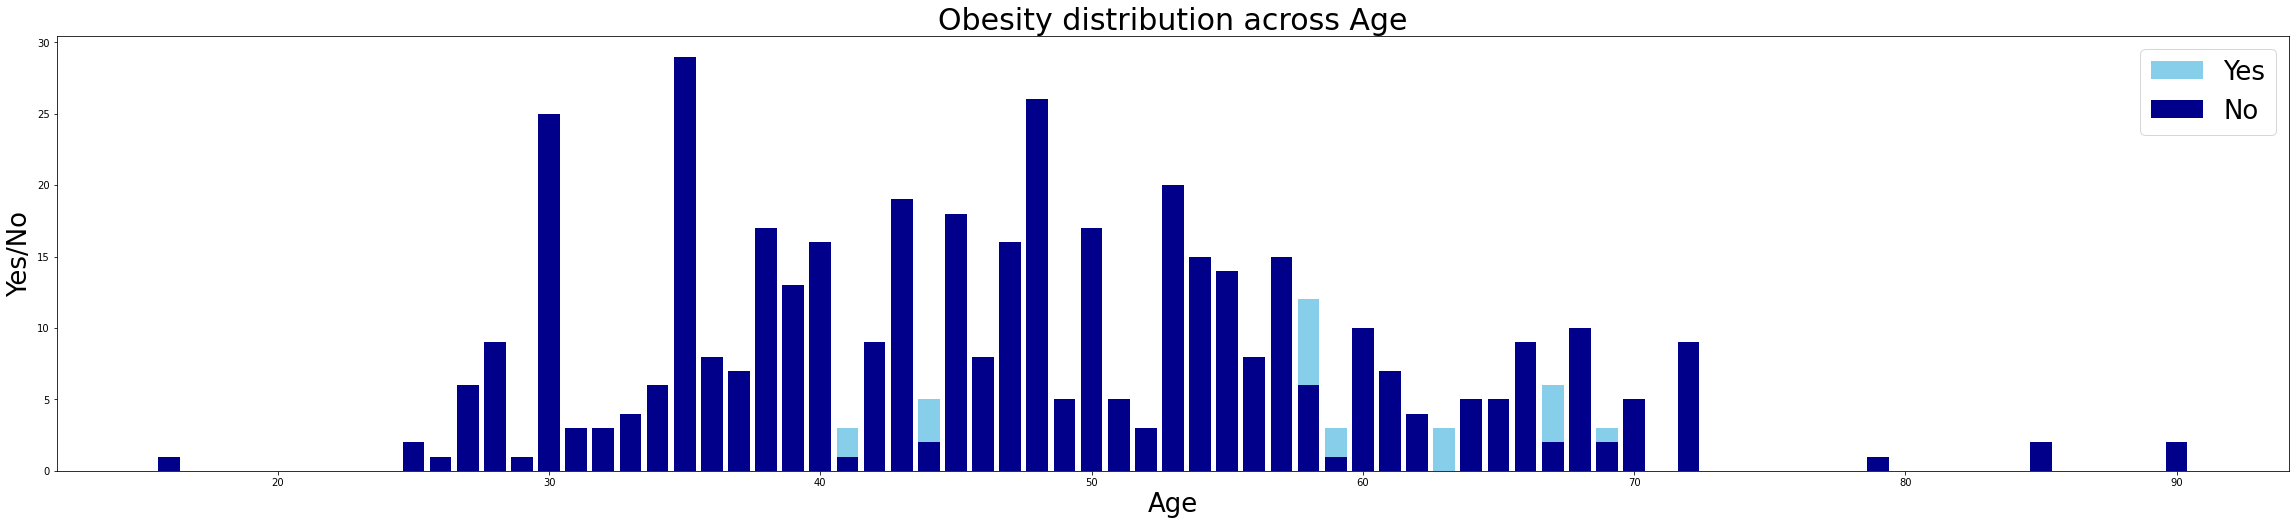

In [ ]:
fig,ax1=plt.subplots(1,1,figsize=(40,8))
ax1.bar(Obesity_df.index,Obesity_df['Yes'],color="skyblue",label="Yes")
ax1.bar(Obesity_df.index,Obesity_df['No'],color="darkblue",label="No")

for index in Obesity_df.index:
    ax1.annotate(Obesity_df["No"].loc[index],xy=(index,Obesity_df["No"].loc[index]+100),ha="center",va="center",fontsize=18)
    ax1.annotate(Obesity_df["Yes"].loc[index],xy=(index,Obesity_df["Yes"].loc[index]-100),ha="center",va="center",fontsize=18)

plt.legend(fontsize=26)
plt.xlabel("Age",fontsize=26)
plt.ylabel("Yes/No",fontsize=26)
plt.title("Obesity distribution across Age",fontsize=30)
plt.show()

**Pie Chart**

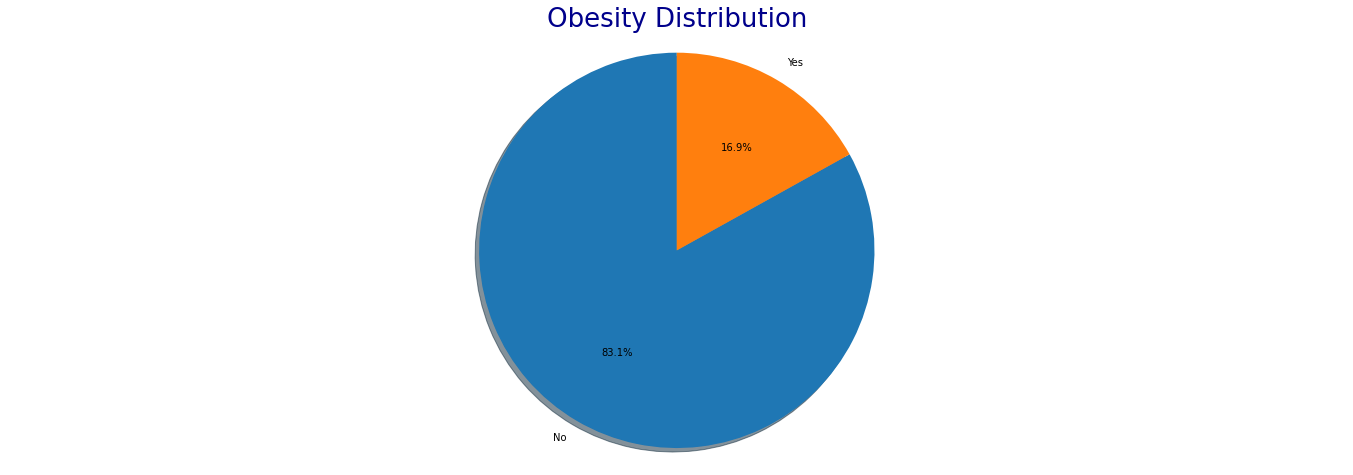

In [ ]:
df_=df['Obesity'].value_counts()
df_

labels=df_.index
sizes=df_.values
fig,ax1=plt.subplots(1,1,figsize=(24,8))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis("equal")
plt.title("Obesity Distribution",fontsize=26, color="Darkblue")
plt.show()

## **Class**

In [ ]:
class_dict={}
for class_ in df['class'].value_counts().index:
    class_dict[class_]=df[df['class']==class_]['Age'].value_counts()
class_df=pd.DataFrame(class_dict)
class_df.index.rename("Age",inplace=True)

**Histogram**

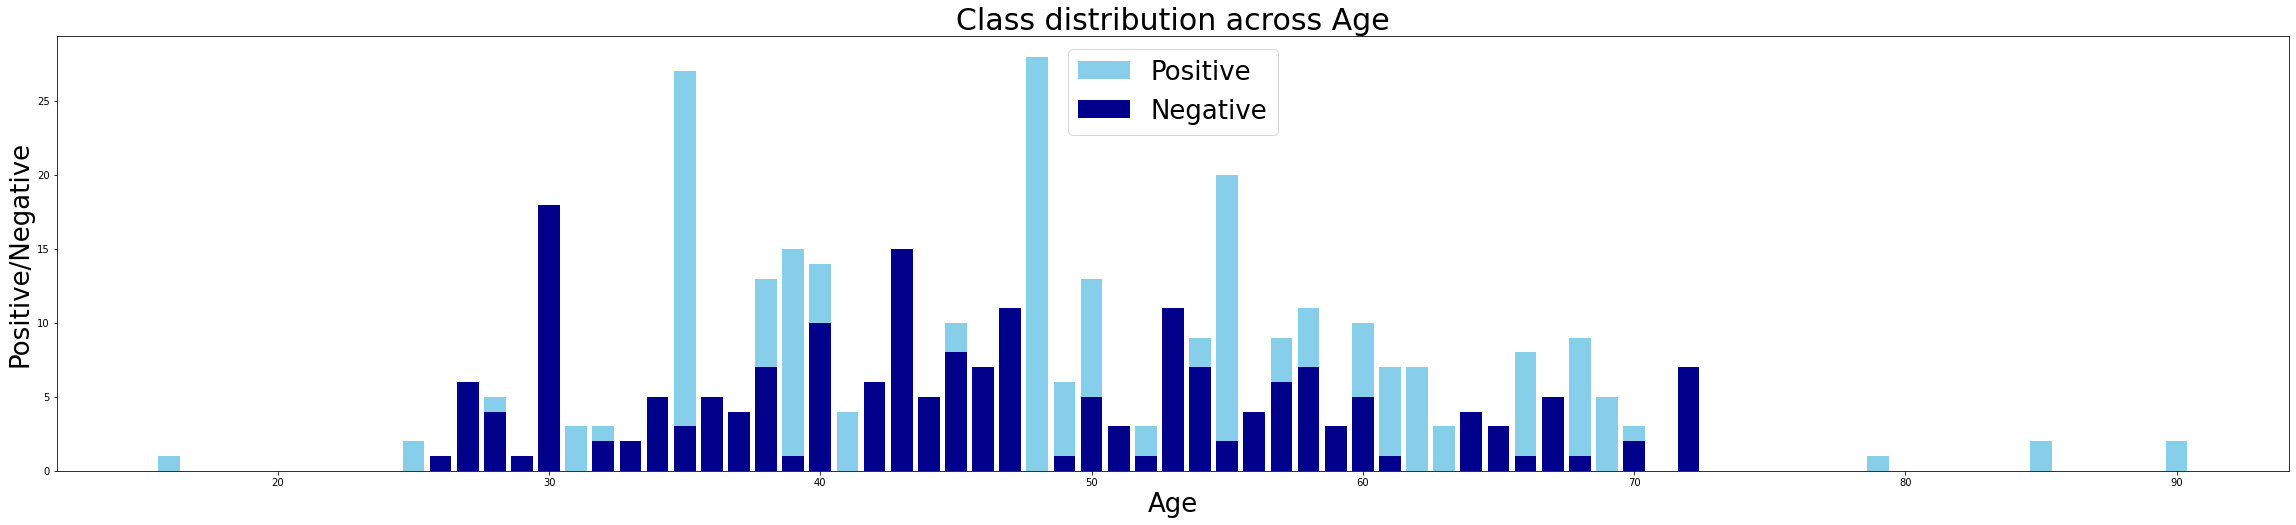

In [ ]:
fig,ax1=plt.subplots(1,1,figsize=(40,8))
ax1.bar(class_df.index,class_df['Positive'],color="skyblue",label="Positive")
ax1.bar(class_df.index,class_df['Negative'],color="darkblue",label="Negative")

for index in class_df.index:
    ax1.annotate(class_df["Negative"].loc[index],xy=(index,class_df["Negative"].loc[index]+100),ha="center",va="center",fontsize=18)
    ax1.annotate(class_df["Positive"].loc[index],xy=(index,class_df["Positive"].loc[index]-100),ha="center",va="center",fontsize=18)

plt.legend(fontsize=26)
plt.xlabel("Age",fontsize=26)
plt.ylabel("Positive/Negative",fontsize=26)
plt.title("Class distribution across Age",fontsize=30)
plt.show()

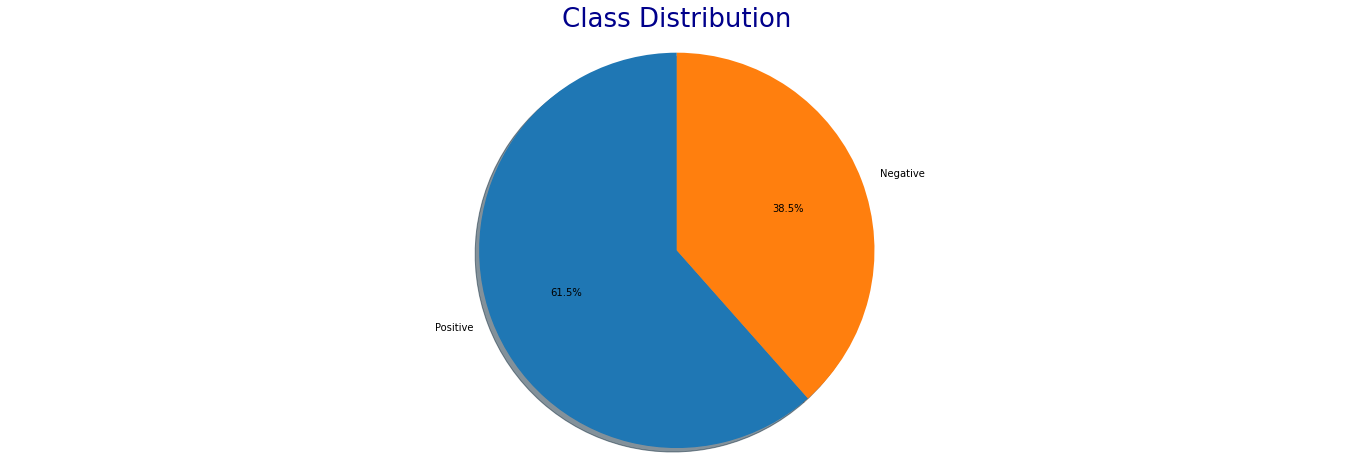

In [ ]:
df_=df['class'].value_counts()
df_

labels=df_.index
sizes=df_.values
fig,ax1=plt.subplots(1,1,figsize=(24,8))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis("equal")
plt.title("Class Distribution",fontsize=26, color="Darkblue")
plt.show()